In [140]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
import os
from us import states
from pathlib import Path
%matplotlib inline

# Census & gmaps API Keys
api_key = os.getenv("CENSUS_API_KEY")
mapbox_key = os.getenv("MAPBOX_API_KEY")
c_2018 = Census(api_key, year=2018)
c_2017 = Census(api_key, year=2017)
c_2016 = Census(api_key, year=2016)
c_2015 = Census(api_key, year=2015)
c_2014 = Census(api_key, year=2014)
c_2013 = Census(api_key, year=2013)
c_2012 = Census(api_key, year=2012)
c_2011 = Census(api_key, year=2011)
c_2010 = Census(api_key, year=2010)
c_2009 = Census(api_key, year=2009)
c_2008 = Census(api_key, year=2008)
c_2007 = Census(api_key, year=2007)
c_2006 = Census(api_key, year=2006)
c_2005 = Census(api_key, year=2005)
c_2004 = Census(api_key, year=2004)

# Configure gmaps
# gmaps.configure(api_key=gkey)

In [141]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import style
import seaborn as sns
%matplotlib inline

style.use('ggplot')

In [142]:
# Could read in data directly after fetching in the first run and save as pickle below
# census_occupation_gender_df = pd.read_pickle("census_2010_2018_panel_index_free_df.pickle")
census_occupation_gender_df = pd.read_pickle("census_2010_2018_panel_df.pickle").reset_index()
census_occupation_gender_df

Year State County                       Name  Population  Median Age  \
0   2010    36    005     Bronx County, New York   1386657.0        32.8   
1   2010    36    047     Kings County, New York   2508340.0        34.2   
2   2010    36    061  New York County, New York   1586698.0        36.4   
3   2010    36    081    Queens County, New York   2233841.0        37.3   
4   2010    36    085  Richmond County, New York    469363.0        38.7   
5   2011    36    005     Bronx County, New York   1392002.0        32.8   
6   2011    36    047     Kings County, New York   2532645.0        34.2   
7   2011    36    061  New York County, New York   1601948.0        36.5   
8   2011    36    081    Queens County, New York   2247848.0        37.4   
9   2011    36    085  Richmond County, New York    470467.0        38.6   
10  2012    36    005     Bronx County, New York   1408473.0        33.0   
11  2012    36    047     Kings County, New York   2565635.0        34.2   
12  2012    36    061  New York County, New York   1619090.0        36.5   
13  2012    36    081    Queens County, New York   2272771.0        37.5   
14  2012    36    085  Richmond County, New York    470728.0        38.9   
15  2013    36    005     Bronx County, New York   1418733.0        33.3   
16  2013    36    047     Kings County, New York   2592149.0        34.4   
17  2013    36    061  New York County, New York   1626159.0        36.7   
18  2013    36    081    Queens County, New York   2296175.0        37.7   
19  2013    36    085  Richmond County, New York    472621.0        39.6   
20  2014    36    005     Bronx County, New York   1438159.0        33.4   
21  2014    36    047     Kings County, New York   2621793.0        34.5   
22  2014    36    061  New York County, New York   1636268.0        36.6   
23  2014    36    081    Queens County, New York   2321580.0        37.8   
24  2014    36    085  Richmond County, New York    473279.0        39.7   
25  2015    36    005     Bronx County, New York   1455444.0        33.6   
26  2015    36    047     Kings County, New York   2636735.0        34.7   
27  2015    36    061  New York County, New York   1644518.0        36.8   
28  2015    36    081    Queens County, New York   2339150.0        38.1   
29  2015    36    085  Richmond County, New York    474558.0        39.8   
30  2016    36    005     Bronx County, New York   1455720.0        33.6   
31  2016    36    047     Kings County, New York   2629150.0        34.8   
32  2016    36    061  New York County, New York   1643734.0        37.1   
33  2016    36    081    Queens County, New York   2333054.0        38.3   
34  2016    36    085  Richmond County, New York    476015.0        39.7   
35  2017    36    005     Bronx County, New York   1471160.0        34.0   
36  2017    36    047     Kings County, New York   2648771.0        35.2   
37  2017    36    061  New York County, New York   1664727.0        37.3   
38  2017    36    081    Queens County, New York   2358582.0        38.7   
39  2017    36    085  Richmond County, New York    479458.0        40.4   
40  2018    36    061  New York County, New York   1628701.0        37.6   
41  2018    36    047     Kings County, New York   2582830.0        35.4   
42  2018    36    081    Queens County, New York   2278906.0        39.2   
43  2018    36    005     Bronx County, New York   1432132.0        34.4   
44  2018    36    085  Richmond County, New York    476179.0        40.1   

    Household Income  Per Capita Income  Poverty Count  Poverty Rate  ...  \
0            32568.0            16671.0       408584.0     29.465398  ...   
1            42143.0            23218.0       571936.0     22.801375  ...   
2            63832.0            56556.0       254289.0     16.026301  ...   
3            53054.0            24530.0       332165.0     14.869680  ...   
4            70560.0            30122.0        54353.0     11.580163  ...   
5            32058.0            16879.0      

In [143]:
financial_specialists = pd.DataFrame()

financial_specialists['Year']=census_occupation_gender_df['Year']
financial_specialists['Name']=census_occupation_gender_df['Name']
financial_specialists['County']=census_occupation_gender_df['County']
financial_specialists['Financial_specialists_male']=census_occupation_gender_df['Financial_specialists_male']
financial_specialists['Financial_specialists_female']=census_occupation_gender_df['Financial_specialists_female']

financial_specialists

Year                       Name County  Financial_specialists_male  \
0   2010     Bronx County, New York    005                      2922.0   
1   2010     Kings County, New York    047                     10578.0   
2   2010  New York County, New York    061                     22505.0   
3   2010    Queens County, New York    081                     12474.0   
4   2010  Richmond County, New York    085                      2906.0   
5   2011     Bronx County, New York    005                      3036.0   
6   2011     Kings County, New York    047                     12407.0   
7   2011  New York County, New York    061                     26440.0   
8   2011    Queens County, New York    081                     12283.0   
9   2011  Richmond County, New York    085                      3572.0   
10  2012     Bronx County, New York    005                      2559.0   
11  2012     Kings County, New York    047                     10900.0   
12  2012  New York County, New York    061                     25304.0   
13  2012    Queens County, New York    081                     12352.0   
14  2012  Richmond County, New York    085                      2745.0   
15  2013     Bronx County, New York    005                      1974.0   
16  2013     Kings County, New York    047                     10765.0   
17  2013  New York County, New York    061                     23033.0   
18  2013    Queens County, New York    081                     12428.0   
19  2013  Richmond County, New York    085                      3765.0   
20  2014     Bronx County, New York    005                      3252.0   
21  2014     Kings County, New York    047                     11821.0   
22  2014  New York County, New York    061                     21701.0   
23  2014    Queens County, New York    081                     11948.0   
24  2014  Richmond County, New York    085                      3114.0   
25  2015     Bronx County, New York    005                      2852.0   
26  2015     Kings County, New York    047                     10096.0   
27  2015  New York County, New York    061                     22486.0   
28  2015    Queens County, New York    081                     13864.0   
29  2015  Richmond County, New York    085                      2924.0   
30  2016     Bronx County, New York    005                      3171.0   
31  2016     Kings County, New York    047                     11162.0   
32  2016  New York County, New York    061                     23648.0   
33  2016    Queens County, New York    081                     12805.0   
34  2016  Richmond County, New York    085                      3704.0   
35  2017     Bronx County, New York    005                      2950.0   
36  2017     Kings County, New York    047                     11608.0   
37  2017  New York County, New York    061                     28096.0   
38  2017    Queens County, New York    081                     14777.0   
39  2017  Richmond County, New York    085                      3274.0   
40  2018  New York County, New York    061                     22645.0   
41  2018     Kings County, New York    047                     11139.0   
42  2018    Queens County, New York    081                     11494.0   
43  2018     Bronx County, New York    005                      2336.0   
44  2018  Richmond County, New York    085                      3342.0   

    Financial_specialists_female  
0                         4344.0  
1                        10787.0  
2                        13964.0  
3                        13008.0  
4                         1931.0  
5                         4054.0  
6                         9384.0  
7                        13585.0  
8                        12396.0  
9                         1964.0  
10                        4782.0  
11                       11310.0  
12                       13628.0  
13                       12281.0  
14                        2989.0  
15                        4596.0  
16  

In [144]:
financial_specialists.set_index(['County', 'Year', 'Name'], inplace=True)
financial_specialists

Financial_specialists_male  \
County Year Name                                                    
005    2010 Bronx County, New York                         2922.0   
047    2010 Kings County, New York                        10578.0   
061    2010 New York County, New York                     22505.0   
081    2010 Queens County, New York                       12474.0   
085    2010 Richmond County, New York                      2906.0   
005    2011 Bronx County, New York                         3036.0   
047    2011 Kings County, New York                        12407.0   
061    2011 New York County, New York                     26440.0   
081    2011 Queens County, New York                       12283.0   
085    2011 Richmond County, New York                      3572.0   
005    2012 Bronx County, New York                         2559.0   
047    2012 Kings County, New York                        10900.0   
061    2012 New York County, New York                     25304.0   
081    2012 Queens County, New York                       12352.0   
085    2012 Richmond County, New York                      2745.0   
005    2013 Bronx County, New York                         1974.0   
047    2013 Kings County, New York                        10765.0   
061    2013 New York County, New York                     23033.0   
081    2013 Queens County, New York                       12428.0   
085    2013 Richmond County, New York                      3765.0   
005    2014 Bronx County, New York                         3252.0   
047    2014 Kings County, New York                        11821.0   
061    2014 New York County, New York                     21701.0   
081    2014 Queens County, New York                       11948.0   
085    2014 Richmond County, New York                      3114.0   
005    2015 Bronx County, New York                         2852.0   
047    2015 Kings County, New York                        10096.0   
061    2015 New York County, New York                     22486.0   
081    2015 Queens County, New York                       13864.0   
085    2015 Richmond County, New York                      2924.0   
005    2016 Bronx County, New York                         3171.0   
047    2016 Kings County, New York                        11162.0   
061    2016 New York County, New York                     23648.0   
081    2016 Queens County, New York                       12805.0   
085    2016 Richmond County, New York                      3704.0   
005    2017 Bronx County, New York                         2950.0   
047    2017 Kings County, New York                        11608.0   
061    2017 New York County, New York                     28096.0   
081    2017 Queens County, New York                       14777.0   
085    2017 Richmond County, New York                      3274.0   
061    2018 New York County, New York                     22645.0   
047    2018 Kings County, New York                        11139.0   
081    2018 Queens County, New York                       11494.0   
005    2018 Bronx County, New York                         2336.0   
085    2018 Richmond County, New York                      3342.0   

                                       Financial_specialists_female  
County Year Name                                                     
005    2010 Bronx County, New York                           4344.0  
047    2010 Kings County, New York                          10787.0  
061    2010 New York County, New York                       13964.0  
081    2010 Queens County, New York                         13008.0  
085    2010 Richmond County, New York                        1931.0  
005    2011 Bronx County, New York                           4054.0  
047    2011 Kings County, New York                           9384.0  
061    2011 New York County, New York                       13585.0  
081    2011 Queens County, New York                         12396.0  
085    2011 Richmond Coun

## Sort by Borough to get annual time-series data

In [145]:
financial_specialists_Bronx = financial_specialists.loc[['005']]
financial_specialists_Bronx

Financial_specialists_male  \
County Year Name                                                 
005    2010 Bronx County, New York                      2922.0   
       2011 Bronx County, New York                      3036.0   
       2012 Bronx County, New York                      2559.0   
       2013 Bronx County, New York                      1974.0   
       2014 Bronx County, New York                      3252.0   
       2015 Bronx County, New York                      2852.0   
       2016 Bronx County, New York                      3171.0   
       2017 Bronx County, New York                      2950.0   
       2018 Bronx County, New York                      2336.0   

                                    Financial_specialists_female  
County Year Name                                                  
005    2010 Bronx County, New York                        4344.0  
       2011 Bronx County, New York                        4054.0  
       2012 Bronx County, New York                        4782.0  
       2013 Bronx County, New York                        4596.0  
       2014 Bronx County, New York                        3024.0  
       2015 Bronx County, New York                        3929.0  
       2016 Bronx County, New York                        4453.0  
       2017 Bronx County, New York                        3983.0  
       2018 Bronx County, New York                        3640.0

In [146]:
financial_specialists_Brooklyn = financial_specialists.loc[['047']]
financial_specialists_Brooklyn 

Financial_specialists_male  \
County Year Name                                                 
047    2010 Kings County, New York                     10578.0   
       2011 Kings County, New York                     12407.0   
       2012 Kings County, New York                     10900.0   
       2013 Kings County, New York                     10765.0   
       2014 Kings County, New York                     11821.0   
       2015 Kings County, New York                     10096.0   
       2016 Kings County, New York                     11162.0   
       2017 Kings County, New York                     11608.0   
       2018 Kings County, New York                     11139.0   

                                    Financial_specialists_female  
County Year Name                                                  
047    2010 Kings County, New York                       10787.0  
       2011 Kings County, New York                        9384.0  
       2012 Kings County, New York                       11310.0  
       2013 Kings County, New York                       11266.0  
       2014 Kings County, New York                        8698.0  
       2015 Kings County, New York                       11658.0  
       2016 Kings County, New York                       10285.0  
       2017 Kings County, New York                       11816.0  
       2018 Kings County, New York                       13903.0

In [150]:
financial_specialists_Manhattan = financial_specialists.loc[['061']]
financial_specialists_Manhattan 

Financial_specialists_male  \
County Year Name                                                    
061    2010 New York County, New York                     22505.0   
       2011 New York County, New York                     26440.0   
       2012 New York County, New York                     25304.0   
       2013 New York County, New York                     23033.0   
       2014 New York County, New York                     21701.0   
       2015 New York County, New York                     22486.0   
       2016 New York County, New York                     23648.0   
       2017 New York County, New York                     28096.0   
       2018 New York County, New York                     22645.0   

                                       Financial_specialists_female  
County Year Name                                                     
061    2010 New York County, New York                       13964.0  
       2011 New York County, New York                       13585.0  
       2012 New York County, New York                       13628.0  
       2013 New York County, New York                       13645.0  
       2014 New York County, New York                       14898.0  
       2015 New York County, New York                       11651.0  
       2016 New York County, New York                       13293.0  
       2017 New York County, New York                       10637.0  
       2018 New York County, New York                       10456.0

In [151]:
financial_specialists_Queens = financial_specialists.loc[['081']]
financial_specialists_Queens

Financial_specialists_male  \
County Year Name                                                  
081    2010 Queens County, New York                     12474.0   
       2011 Queens County, New York                     12283.0   
       2012 Queens County, New York                     12352.0   
       2013 Queens County, New York                     12428.0   
       2014 Queens County, New York                     11948.0   
       2015 Queens County, New York                     13864.0   
       2016 Queens County, New York                     12805.0   
       2017 Queens County, New York                     14777.0   
       2018 Queens County, New York                     11494.0   

                                     Financial_specialists_female  
County Year Name                                                   
081    2010 Queens County, New York                       13008.0  
       2011 Queens County, New York                       12396.0  
       2012 Queens County, New York                       12281.0  
       2013 Queens County, New York                       14374.0  
       2014 Queens County, New York                       13265.0  
       2015 Queens County, New York                       14109.0  
       2016 Queens County, New York                       13697.0  
       2017 Queens County, New York                       13611.0  
       2018 Queens County, New York                       13281.0

In [152]:
financial_specialists_Staten_Island = financial_specialists.loc[['085']]
financial_specialists_Staten_Island

Financial_specialists_male  \
County Year Name                                                    
085    2010 Richmond County, New York                      2906.0   
       2011 Richmond County, New York                      3572.0   
       2012 Richmond County, New York                      2745.0   
       2013 Richmond County, New York                      3765.0   
       2014 Richmond County, New York                      3114.0   
       2015 Richmond County, New York                      2924.0   
       2016 Richmond County, New York                      3704.0   
       2017 Richmond County, New York                      3274.0   
       2018 Richmond County, New York                      3342.0   

                                       Financial_specialists_female  
County Year Name                                                     
085    2010 Richmond County, New York                        1931.0  
       2011 Richmond County, New York                        1964.0  
       2012 Richmond County, New York                        2989.0  
       2013 Richmond County, New York                        2190.0  
       2014 Richmond County, New York                        1606.0  
       2015 Richmond County, New York                        2988.0  
       2016 Richmond County, New York                        1802.0  
       2017 Richmond County, New York                        2378.0  
       2018 Richmond County, New York                        3495.0

### Monte Carlo Simulation on Financial Specialists in Manhattan Over 30 Years From 2018

In [153]:
# Get 1 year's worth of historical data
df = financial_specialists_Manhattan
df

Financial_specialists_male  \
County Year Name                                                    
061    2010 New York County, New York                     22505.0   
       2011 New York County, New York                     26440.0   
       2012 New York County, New York                     25304.0   
       2013 New York County, New York                     23033.0   
       2014 New York County, New York                     21701.0   
       2015 New York County, New York                     22486.0   
       2016 New York County, New York                     23648.0   
       2017 New York County, New York                     28096.0   
       2018 New York County, New York                     22645.0   

                                       Financial_specialists_female  
County Year Name                                                     
061    2010 New York County, New York                       13964.0  
       2011 New York County, New York                       13585.0  
       2012 New York County, New York                       13628.0  
       2013 New York County, New York                       13645.0  
       2014 New York County, New York                       14898.0  
       2015 New York County, New York                       11651.0  
       2016 New York County, New York                       13293.0  
       2017 New York County, New York                       10637.0  
       2018 New York County, New York                       10456.0

In [154]:
# Use the `drop` function with the `level` parameter to drop extra columns in the multi-index DataFrame
# df.drop(columns=['', '', '', ''], level=1, inplace=True) # drop columns
#df.head()

In [155]:
# Use the `pct_change` function to calculate daily returns of `TSLA` and `SPHD`.
annual_moves = df.pct_change().fillna(0)
annual_moves

Financial_specialists_male  \
County Year Name                                                    
061    2010 New York County, New York                    0.000000   
       2011 New York County, New York                    0.174850   
       2012 New York County, New York                   -0.042965   
       2013 New York County, New York                   -0.089749   
       2014 New York County, New York                   -0.057830   
       2015 New York County, New York                    0.036173   
       2016 New York County, New York                    0.051677   
       2017 New York County, New York                    0.188092   
       2018 New York County, New York                   -0.194013   

                                       Financial_specialists_female  
County Year Name                                                     
061    2010 New York County, New York                      0.000000  
       2011 New York County, New York                     -0.027141  
       2012 New York County, New York                      0.003165  
       2013 New York County, New York                      0.001247  
       2014 New York County, New York                      0.091829  
       2015 New York County, New York                     -0.217949  
       2016 New York County, New York                      0.140932  
       2017 New York County, New York                     -0.199804  
       2018 New York County, New York                     -0.017016

In [156]:
# Use the `mean` function to calculate the mean of market moves for `male` and `female`, respectively
avg_annual_moves_financial_specialists_male = annual_moves.mean()['Financial_specialists_male']
avg_annual_moves_financial_specialists_female = annual_moves.mean()['Financial_specialists_female']
avg_annual_moves_financial_specialists_male

0.007359420378032018

In [157]:
avg_annual_moves_financial_specialists_female

-0.024970790836429835

In [158]:
# Use the `std` function to calculate the standard deviation of market moves for `male` and `female`, respectively
std_dev_annual_moves_financial_specialists_male = annual_moves.std()['Financial_specialists_male']
std_dev_annual_moves_financial_specialists_female = annual_moves.std()['Financial_specialists_female']
std_dev_annual_moves_financial_specialists_female

0.11786840309957754

In [159]:
std_dev_annual_moves_financial_specialists_male

0.12264227455573176

In [160]:
# Set number of simulations and trading days
num_simulations = 1000
num_years = 30

# Set last employment figures of `Software_devops_male` and `Software_devops_female`
financial_specialists_male_last  = df['Financial_specialists_male'][-1]
financial_specialists_female_last = df['Financial_specialists_female'][-1]
# financial_specialists_female_last = df['Financial_specialists_female'][-1]

# Initialize empty DataFrame to hold simulated employment data for each simulation
simulated_employed_df = pd.DataFrame()
employed_cumulative_moves = pd.DataFrame()

# Run the simulation of projecting employment for the next 30 years, `1000` times
for n in range(num_simulations):
    
    count = 0
    
    simulated_financial_specialist_male = []
    simulated_financial_specialist_female = []

    # Initialize the simulated prices list with the last employmentdata of `Software_devops_male` and `Software_devops_female`
    simulated_financial_specialists_male = [financial_specialists_male_last]
    simulated_financial_specialists_female = [financial_specialists_female_last]
    
    
    # Simulate the returns for 30 years
    for i in range(num_years):
        
        if count == 30:
            break
            
        simulated_financial_specialist_male = simulated_financial_specialists_male[count] * (1 + np.random.normal(avg_annual_moves_financial_specialists_male, std_dev_annual_moves_financial_specialists_male))
        simulated_financial_specialist_female = simulated_financial_specialists_female[count] * (1 + np.random.normal(avg_annual_moves_financial_specialists_female, std_dev_annual_moves_financial_specialists_female))

        simulated_financial_specialists_male.append(simulated_financial_specialist_male)
        simulated_financial_specialists_female.append(simulated_financial_specialist_female)
        
        count += 1
            
    # Append a simulated prices of each simulation to DataFrame
    simulated_employed_df['Financial_specialists_male'] = simulated_financial_specialists_male
    simulated_employed_df['Financial_specialists_female'] = simulated_financial_specialists_female
    
    # Calculate the daily returns of simulated prices
    simulated_employed_moves = simulated_employed_df.pct_change()
    
    # Set the portfolio weights (0% male; 100% female)
    weights = [0.0, 1.0]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    employed_annual_moves = simulated_employed_moves.dot(weights)
    
    # Calculate the normalized, cumulative return series
    employed_cumulative_moves[n] = (1 + employed_annual_moves.fillna(0)).cumprod()

# Print records from the DataFrame
employed_cumulative_moves

0         1         2         3         4         5         6    \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   1.036817  1.036943  1.038302  0.994223  0.826126  1.202002  1.094736   
2   0.828799  1.086562  1.106876  1.199458  0.875656  1.078041  1.086347   
3   0.841538  1.135535  0.975697  1.028331  1.077135  0.975953  1.118183   
4   0.811493  1.142501  1.015268  1.059509  1.238567  1.072152  0.903813   
5   0.833976  1.131952  0.895791  1.357315  1.265555  1.079896  0.857592   
6   0.830582  1.214341  0.870266  1.417853  1.070336  1.127324  0.916878   
7   0.937241  1.275278  0.792606  1.531338  0.802719  1.410226  0.997057   
8   0.992249  1.297407  0.902593  1.437676  0.602050  1.401457  0.849762   
9   0.779037  1.592457  0.873387  1.289157  0.510149  1.428085  0.813083   
10  0.612034  1.557313  0.980902  1.153069  0.451080  1.203629  0.916531   
11  0.555474  1.249648  0.875748  0.931802  0.480528  1.364912  0.912862   
12  0.517470  0.897165  0.867279  0.936774  0.466813  1.442704  0.927573   
13  0.642048  0.991634  0.842389  0.841008  0.421925  1.229197  1.015426   
14  0.613100  0.936396  0.714687  0.761159  0.377038  1.173357  1.027476   
15  0.635548  0.806284  0.592037  0.777489  0.366669  1.293670  1.021894   
16  0.652444  0.697680  0.550981  0.695378  0.394610  1.252906  1.095484   
17  0.657671  0.676090  0.473424  0.563110  0.400988  1.283055  0.947664   
18  0.606670  0.659454  0.401025  0.592231  0.401825  1.201592  0.998326   
19  0.622222  0.692671  0.404026  0.630517  0.446682  1.034866  0.917266   
20  0.600881  0.763255  0.366120  0.576699  0.428662  1.045975  0.892990   
21  0.651234  0.607418  0.348712  0.653110  0.454403  1.001095  0.884686   
22  0.650315  0.679160  0.366216  0.558548  0.483269  0.941284  0.779453   
23  0.633515  0.739755  0.333422  0.491523  0.389175  0.735858  0.813164   
24  0.526396  0.669891  0.285847  0.456504  0.364029  0.798006  0.767949   
25  0.447013  0.676384  0.309363  0.454309  0.381893  0.909480  0.717149   
26  0.359132  0.563491  0.292708  0.365621  0.385807  0.997053  0.677983   
27  0.379458  0.529769  0.326819  0.369735  0.366482  1.006763  0.741216   
28  0.329430  0.624340  0.281117  0.324128  0.372476  1.267379  0.724898   
29  0.329159  0.739271  0.267058  0.337806  0.393578  1.343396  0.664258   
30  0.302685  0.741387  0.206573  0.263534  0.411992  1.496854  0.545645   

         7         8         9    ...       990       991       992       993  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   1.058256  0.985668  0.906008  ...  0.958029  1.087461  1.177610  1.117055   
2   0.923707  1.066057  0.854139  ...  0.800219  1.315087  0.860578  1.161224   
3   0.894900  0.913382  0.709140  ...  0.779121  1.107342  0.734168  1.089703   
4   0.819850  0.846031  0.554699  ...  0.893712  1.097715  0.580351  0.975604   
5   0.691443  0.860841  0.510637  ...  0.940729  1.040723  0.545401  0.922982   
6   0.670990  0.823453  0.411352  ...  1.050683  0.868416  0.501599  0.868467   
7   0.748542  0.793165  0.431659  ...  1.083613  1.010327  0.526472  0.934006   
8   0.577814  0.760388  0.389938  ...  0.951862  0.758313  0.526763  0.922493   
9   0.569036  0.752461  0.361551  ...  0.809743  0.711590  0.423073  0.949611   
10  0.545891  0.661394  0.307280  ...  0.795329  0.735044  0.419813  1.003895   
11  0.501938  0.740352  0.327866  ...  0.926340  0.660205  0.362470  0.903627   
12  0.403927  0.683457  0.324663  ...  0.950749  0.651694  0.365884  0.719271   
13  0.324790  0.669220  0.354989  ...  0.986401  0.752486  0.336907  0.726074   
14  0.257911  0.705647  0.435329  ...  1.074898  0.653628  0.348131  0.614830   
15  0.227034  0.653856  0.470381  ...  1.191745  0.655819  0.301350  0.571765   
16  0.214290  0.663453  0.393560  ...  1.100577  0.663262  0.245698  0.426022   
17  0.197725  0.694237  0.328849  ...  1.240138  0.584028  0.243086  0.452932   
18  0.194722  0.681914  0.311989  ...

<Figure size 432x288 with 0 Axes>

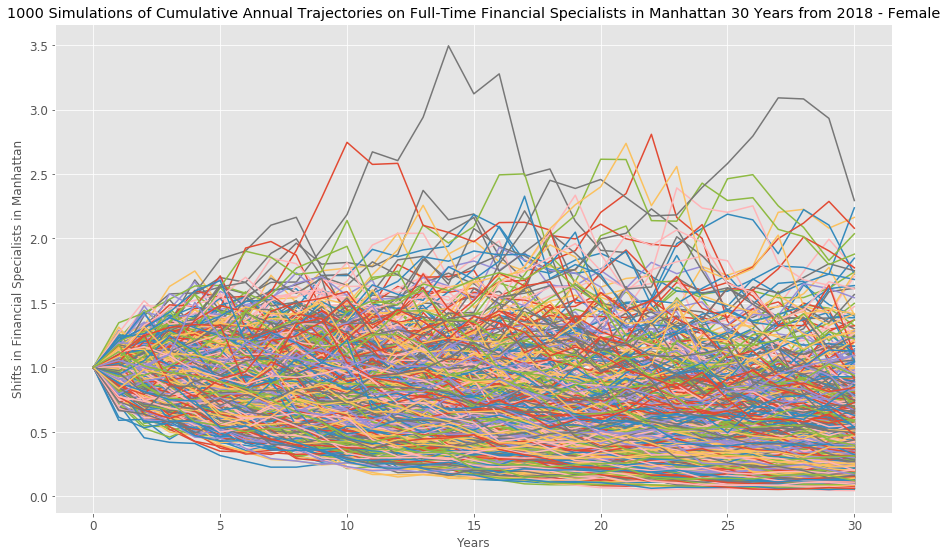

In [161]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the employment on software developers based on a year
monte_carlo_cum_moves = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Financial Specialists in Manhattan 30 Years from 2018 - Female"
employed_cumulative_moves.plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Shifts in Financial Specialists in Manhattan')
plt.show()

In [162]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
ending_cumulative_moves = employed_cumulative_moves.iloc[-1, :]
ending_cumulative_moves.head()

0    0.302685
1    0.741387
2    0.206573
3    0.263534
4    0.411992
Name: 30, dtype: float64

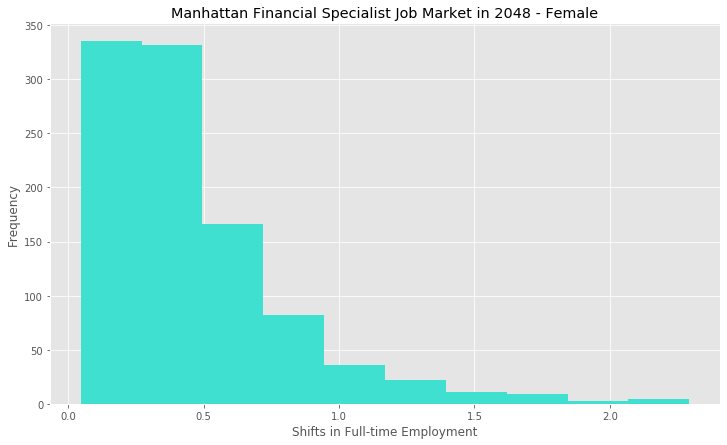

In [164]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
fig_hist_manhattan = plt.figure()
ending_cumulative_moves.plot(kind='hist', bins=10, color = 'turquoise', 
                             title='Manhattan Financial Specialist Job Market in 2048 - Female', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.show()

In [165]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative return ranges
ending_cumulative_moves.value_counts(bins=10) / len(ending_cumulative_moves)

(0.0417, 0.27]    0.335
(0.27, 0.495]     0.332
(0.495, 0.72]     0.166
(0.72, 0.945]     0.082
(0.945, 1.17]     0.036
(1.17, 1.395]     0.022
(1.395, 1.619]    0.011
(1.619, 1.844]    0.009
(2.069, 2.294]    0.004
(1.844, 2.069]    0.003
Name: 30, dtype: float64

In [166]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
confidence_interval = ending_cumulative_moves.quantile(q=[0.025, 0.975])
confidence_interval

0.025    0.093849
0.975    1.407477
Name: 30, dtype: float64

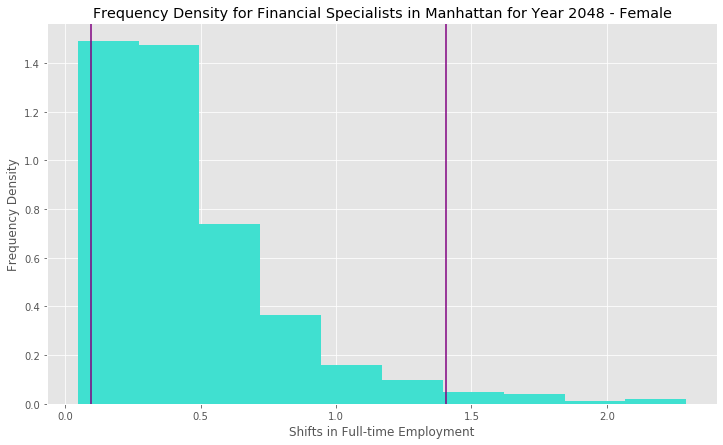

In [167]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_cum_moves = plt.figure()
ending_cumulative_moves.plot(kind='hist', density=True, bins=10, color = 'turquoise', 
                             title='Frequency Density for Financial Specialists in Manhattan for Year 2048 - Female', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(confidence_interval.iloc[0], color='purple')
plt.axvline(confidence_interval.iloc[1], color='purple')
plt.show()

In [168]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
tenth_cumulative_moves = employed_cumulative_moves.iloc[-20, :]
tenth_cumulative_moves.head()

0    0.555474
1    1.249648
2    0.875748
3    0.931802
4    0.480528
Name: 11, dtype: float64

In [169]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative return ranges
tenth_cumulative_moves.value_counts(bins=10) / len(ending_cumulative_moves)

(0.42, 0.67]      0.361
(0.67, 0.92]      0.291
(0.92, 1.171]     0.128
(0.166, 0.42]     0.119
(1.171, 1.421]    0.063
(1.421, 1.671]    0.027
(1.671, 1.921]    0.008
(2.422, 2.672]    0.002
(1.921, 2.171]    0.001
(2.171, 2.422]    0.000
Name: 11, dtype: float64

In [170]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
tenth_confidence_interval = tenth_cumulative_moves.quantile(q=[0.025, 0.975])
tenth_confidence_interval

0.025    0.281716
0.975    1.487994
Name: 11, dtype: float64

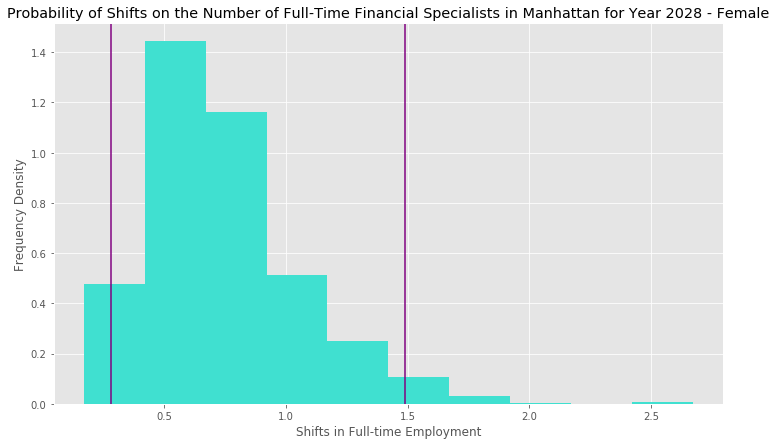

In [171]:
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 95% confidence interval
hist_tenth_cum_moves = plt.figure()
tenth_cumulative_moves.plot(kind='hist', density=True, bins=10, color = 'turquoise', 
                             title='Probability of Shifts on the Number of Full-Time Financial Specialists in Manhattan for Year 2028 - Female', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(tenth_confidence_interval.iloc[0], color='purple')
plt.axvline(tenth_confidence_interval.iloc[1], color='purple')
plt.show()

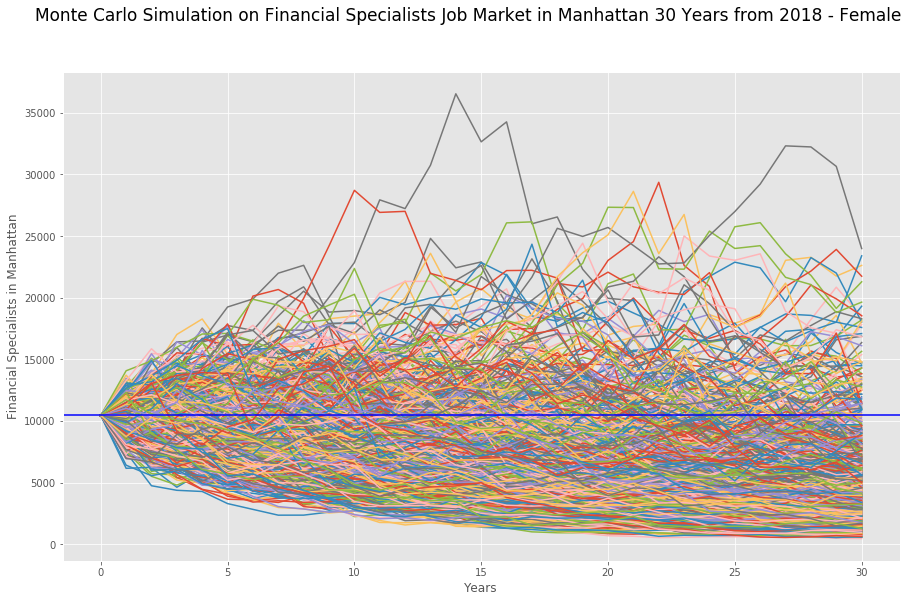

In [173]:
# Set initial investment
initial_employment = financial_specialists_female_last

fig_finance = plt.figure(figsize=(15,9))
fig_finance.suptitle('Monte Carlo Simulation on Financial Specialists Job Market in Manhattan 30 Years from 2018 - Female', fontsize=17)
plt.plot(employed_cumulative_moves * initial_employment)
#plt.axhline(y = financial_specialists_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_specialists_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Manhattan')
plt.show()

In [174]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
employment_gnl_lower_bound = initial_employment * confidence_interval.iloc[0]
employment_gnl_upper_bound = initial_employment * confidence_interval.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment:,.0f}k in female financial specialists"
      f" in Manhattan 30 years from 2018 will end within in the range of"
      f" {employment_gnl_lower_bound:,.0f}k and {employment_gnl_upper_bound:,.0f}k.")

There is a 95% chance that an initial employment of 10,456k in female financial specialists in Manhattan 30 years from 2018 will end within in the range of 981k and 14,717k.


In [244]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
tenth_employment_gnl_lower_bound = initial_employment * tenth_confidence_interval.iloc[0]
tenth_employment_gnl_upper_bound = initial_employment * tenth_confidence_interval.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment:,.0f}k in female financial specialists"
      f" in Manhattan 30 years from 2018 will end within in the range of"
      f" {tenth_employment_gnl_lower_bound:,.0f}k and {tenth_employment_gnl_upper_bound:,.0f}k.")

There is a 95% chance that an initial employment of 10,456k in female financial specialists in Manhattan 30 years from 2018 will end within in the range of 2,946k and 15,558k.


In [175]:
employed_trajectories = initial_employment*employed_cumulative_moves.quantile(q=[0.05, 0.5, 0.95], axis='columns', numeric_only=True).T
employed_trajectories.columns = ['Lower 5%', 'Median', 'Upper 5%']
employed_trajectories

Lower 5%        Median      Upper 5%
0   10456.000000  10456.000000  10456.000000
1    8228.840336  10156.843235  12184.744329
2    7318.667277   9855.093610  12899.979400
3    6574.962546   9568.854229  13262.942249
4    6066.409700   9210.711987  13662.081364
5    5701.643157   8855.369802  13916.557528
6    5208.257883   8591.942091  13884.664704
7    4743.970872   8259.660246  14086.437833
8    4304.256123   7895.768843  14036.154995
9    3996.379360   7596.171349  14403.444702
10   3696.710707   7329.841340  14135.131024
11   3427.805270   7192.053865  14098.008384
12   3285.906621   6937.940186  13901.294061
13   2968.801787   6757.211494  14175.169440
14   2863.896001   6493.466682  14120.720277
15   2655.695006   6316.771335  13973.324145
16   2530.342307   6122.382160  14523.828086
17   2353.582683   5966.962288  14245.665704
18   2073.082307   5679.984704  13939.215806
19   2026.930971   5424.191332  13987.651266
20   1926.836026   5312.963408  13246.265544
21   1978.829812   5190.381639  13156.299034
22   1834.530958   5086.740422  13076.321593
23   1677.728246   4953.680931  13193.220762
24   1559.409383   4741.653018  12575.866183
25   1516.188828   4573.890091  12342.509070
26   1475.970949   4385.561680  12233.348274
27   1371.079707   4254.988117  12080.573146
28   1337.971341   4146.528727  11865.353090
29   1242.821674   3950.992487  12175.015204
30   1168.555114   3808.161850  12170.107443

<Figure size 432x288 with 0 Axes>

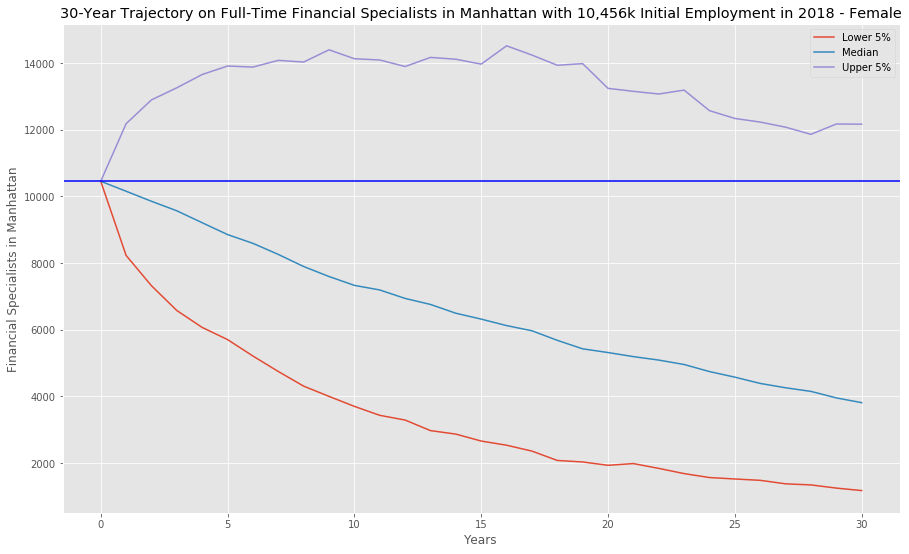

In [310]:
ax_cum_employed = plt.figure()
employed_trajectories.plot(title="30-Year Trajectory on Full-Time Financial Specialists in Manhattan with 10,456k Initial Employment in 2018 - Female",
                          figsize=(15, 9)),
#plt.axhline(y = financial_specialists_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_specialists_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Manhattan')
plt.show()

#### Manhattan Male Financial Specialist:

### Monte Carlo Simulation on Financial Specialists in Manhattan Over 30 Years From 2018

In [178]:
df_bronx = financial_specialists_Bronx
df_bronx

Financial_specialists_male  \
County Year Name                                                 
005    2010 Bronx County, New York                      2922.0   
       2011 Bronx County, New York                      3036.0   
       2012 Bronx County, New York                      2559.0   
       2013 Bronx County, New York                      1974.0   
       2014 Bronx County, New York                      3252.0   
       2015 Bronx County, New York                      2852.0   
       2016 Bronx County, New York                      3171.0   
       2017 Bronx County, New York                      2950.0   
       2018 Bronx County, New York                      2336.0   

                                    Financial_specialists_female  
County Year Name                                                  
005    2010 Bronx County, New York                        4344.0  
       2011 Bronx County, New York                        4054.0  
       2012 Bronx County, New York                        4782.0  
       2013 Bronx County, New York                        4596.0  
       2014 Bronx County, New York                        3024.0  
       2015 Bronx County, New York                        3929.0  
       2016 Bronx County, New York                        4453.0  
       2017 Bronx County, New York                        3983.0  
       2018 Bronx County, New York                        3640.0

In [179]:
# Use the `pct_change` function to calculate daily returns of `male` and `female`.
annual_moves_bronx = df_bronx.pct_change().fillna(0)
annual_moves_bronx

Financial_specialists_male  \
County Year Name                                                 
005    2010 Bronx County, New York                    0.000000   
       2011 Bronx County, New York                    0.039014   
       2012 Bronx County, New York                   -0.157115   
       2013 Bronx County, New York                   -0.228605   
       2014 Bronx County, New York                    0.647416   
       2015 Bronx County, New York                   -0.123001   
       2016 Bronx County, New York                    0.111851   
       2017 Bronx County, New York                   -0.069694   
       2018 Bronx County, New York                   -0.208136   

                                    Financial_specialists_female  
County Year Name                                                  
005    2010 Bronx County, New York                      0.000000  
       2011 Bronx County, New York                     -0.066759  
       2012 Bronx County, New York                      0.179576  
       2013 Bronx County, New York                     -0.038896  
       2014 Bronx County, New York                     -0.342037  
       2015 Bronx County, New York                      0.299272  
       2016 Bronx County, New York                      0.133367  
       2017 Bronx County, New York                     -0.105547  
       2018 Bronx County, New York                     -0.086116

In [180]:
# Use the `mean` function to calculate the mean of market shifts for `male` and `female`, respectively
avg_annual_moves_financial_bronx_male = annual_moves_bronx.mean()['Financial_specialists_male']
avg_annual_moves_financial_bronx_female = annual_moves_bronx.mean()['Financial_specialists_female']
avg_annual_moves_financial_bronx_male

0.0013035161272441458

In [181]:
avg_annual_moves_financial_bronx_female

-0.0030153880620906737

In [182]:
# Use the `std` function to calculate the standard deviation of market moves for `male` and `female`, respectively
std_dev_annual_moves_financial_bronx_male = annual_moves_bronx.std()['Financial_specialists_male']
std_dev_annual_moves_financial_bronx_female = annual_moves_bronx.std()['Financial_specialists_female']
std_dev_annual_moves_financial_bronx_male

0.26772601992691375

In [183]:
std_dev_annual_moves_financial_bronx_female

0.18742704475765454

In [201]:
# Set number of simulations and trading days
num_simulations = 1000
num_years = 30

# Set last employment figures of `Software_devops_male` and `Software_devops_female`
financial_bronx_male_last  = df_bronx['Financial_specialists_male'][-1]
financial_bronx_female_last = df_bronx['Financial_specialists_female'][-1]
# financial_specialists_female_last = df['Financial_specialists_female'][-1]

# Initialize empty DataFrame to hold simulated employment data for each simulation
simulated_bronx_employed_df = pd.DataFrame()
bronx_employed_cumulative_moves = pd.DataFrame()

# Run the simulation of projecting employment for the next 30 years, `1000` times
for n in range(num_simulations):
    
    count = 0
    
    simulated_financial_specialist_bronx_male = []
    simulated_financial_specialist_bronx_female = []

    # Initialize the simulated prices list with the last employmentdata of `Software_devops_male` and `Software_devops_female`
    simulated_financial_specialists_bronx_male = [financial_bronx_male_last]
    simulated_financial_specialists_bronx_female = [financial_bronx_female_last]
    
            

    for i in range(num_years):
        
        if count == 30:
            break
            
        simulated_financial_specialist_bronx_male = simulated_financial_specialists_bronx_male[count] * (1 + np.random.normal(avg_annual_moves_financial_bronx_male, std_dev_annual_moves_financial_bronx_male))
        simulated_financial_specialist_bronx_female = simulated_financial_specialists_bronx_female[count] * (1 + np.random.normal(avg_annual_moves_financial_bronx_female, std_dev_annual_moves_financial_bronx_female))

        simulated_financial_specialists_bronx_male.append(simulated_financial_specialist_bronx_male)
        simulated_financial_specialists_bronx_female.append(simulated_financial_specialist_bronx_female)
        
        count += 1
            
    # Append a simulated prices of each simulation to DataFrame
    simulated_bronx_employed_df['Financial_specialists_male'] = simulated_financial_specialists_bronx_male
    simulated_bronx_employed_df['Financial_specialists_female'] = simulated_financial_specialists_bronx_female
    
    # Calculate the daily returns of simulated prices
    simulated_bronx_employed_moves = simulated_bronx_employed_df.pct_change()
    
    # Set the portfolio weights (0% male; 100% female)
    weights = [0.0, 1.0]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    bronx_employed_annual_moves = simulated_bronx_employed_moves.dot(weights)
    
    # Calculate the normalized, cumulative return series
    bronx_employed_cumulative_moves[n] = (1 + bronx_employed_annual_moves.fillna(0)).cumprod()

# Print records from the DataFrame
bronx_employed_cumulative_moves

0         1         2         3         4         5         6    \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   1.055612  1.307925  0.808520  0.801662  0.828860  1.138173  1.029159   
2   0.798625  1.438250  1.263979  0.824096  0.949061  0.732259  0.801503   
3   1.001382  1.155837  1.198780  0.811347  0.872397  0.984740  0.807410   
4   1.373545  1.476509  0.721794  0.579751  0.670916  1.196003  0.757125   
5   0.967953  1.156704  0.824390  0.674522  0.500977  1.037669  0.835137   
6   0.890169  0.939456  0.719372  0.665629  0.343187  1.066951  0.863801   
7   1.114378  1.296351  0.901954  0.529459  0.329716  1.013426  0.812872   
8   1.450756  1.493632  0.951917  0.507926  0.368661  1.135548  0.836613   
9   1.065024  1.980153  0.961868  0.394507  0.357418  1.056175  0.989229   
10  0.765245  2.058139  1.086867  0.267209  0.368771  0.967830  1.040418   
11  0.853062  1.763166  1.014608  0.340676  0.311242  1.162717  0.853143   
12  0.857882  2.090809  0.713377  0.355914  0.404891  1.814207  0.959254   
13  0.949128  2.225093  0.738978  0.289337  0.369523  1.226722  1.151845   
14  1.157679  1.929974  0.499346  0.389211  0.329616  1.121645  0.984588   
15  1.295244  1.703902  0.431445  0.451322  0.344983  0.995922  0.970556   
16  1.208655  1.629081  0.260606  0.495567  0.496987  0.919962  0.747994   
17  1.030546  1.542777  0.242904  0.422935  0.547544  0.856285  0.522717   
18  0.974728  1.889246  0.169271  0.329219  0.390099  0.827485  0.500295   
19  0.639822  1.359854  0.090379  0.311806  0.275597  1.049466  0.353239   
20  0.586382  1.038387  0.065088  0.265051  0.264468  0.766899  0.437509   
21  0.550981  0.836631  0.052633  0.248828  0.266146  0.751249  0.344194   
22  0.741616  0.968312  0.055303  0.221271  0.332487  0.932546  0.247229   
23  1.000863  1.004169  0.054751  0.174648  0.402268  1.189611  0.265284   
24  1.090837  1.342480  0.048742  0.138327  0.426476  1.311555  0.335949   
25  0.789137  1.355095  0.050873  0.136719  0.323686  1.016169  0.315437   
26  0.540823  1.699615  0.060901  0.124173  0.228453  1.080042  0.262444   
27  0.542491  1.267709  0.058160  0.114635  0.215218  1.173098  0.147432   
28  0.477548  1.091342  0.075352  0.131892  0.199859  1.028841  0.138952   
29  0.507981  0.988320  0.065038  0.146583  0.165111  0.893249  0.135983   
30  0.527040  0.908404  0.035305  0.186587  0.157502  0.917501  0.164751   

         7         8         9    ...       990       991       992       993  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   0.875996  0.935790  0.681340  ...  0.995189  0.824427  0.929463  1.248109   
2   0.933821  0.931956  0.594196  ...  0.820309  1.061034  0.706336  1.079714   
3   1.088480  1.044565  0.606411  ...  0.825472  0.846422  0.813799  0.766250   
4   1.070024  1.031797  0.710699  ...  0.963599  0.919781  0.713676  0.891089   
5   0.997919  1.044845  0.739602  ...  0.915975  0.804605  0.699579  0.834639   
6   0.946685  1.221082  0.685390  ...  0.800064  0.866287  0.495157  0.635616   
7   0.731876  1.350533  0.598753  ...  0.820372  0.818769  0.438314  0.506631   
8   0.745234  1.104749  0.588628  ...  0.643228  0.789689  0.327938  0.653157   
9   1.021786  0.985417  0.442684  ...  0.566352  0.724668  0.344088  0.619350   
10  0.691843  1.236917  0.375521  ...  0.550757  0.684736  0.385135  0.755857   
11  0.856226  1.092091  0.481715  ...  0.619467  0.587468  0.380407  0.610788   
12  0.686329  1.469786  0.486375  ...  0.592100  0.712776  0.448138  0.517643   
13  0.835177  1.670032  0.491653  ...  0.426464  0.626815  0.384978  0.408842   
14  0.937755  1.873404  0.521232  ...  0.539291  0.553285  0.515545  0.434678   
15  0.822233  1.807674  0.503561  ...  0.563688  0.574493  0.498538  0.516933   
16  0.734332  1.883736  0.534271  ...  0.634364  0.748368  0.621440  0.513558   
17  0.493671  2.136696  0.479394  ...  0.652186  0.677752  0.544123  0.389561   
18  0.639408  2.049339  0.521221  ...

<Figure size 432x288 with 0 Axes>

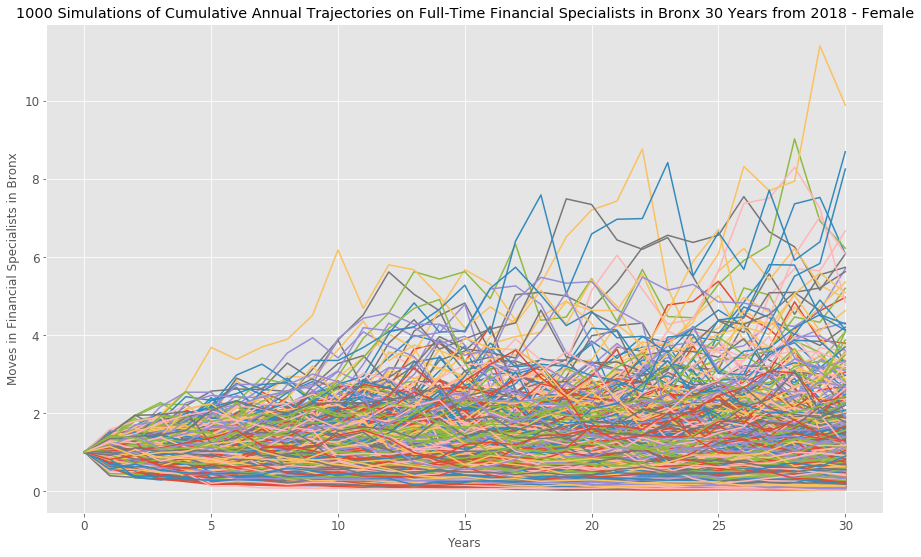

In [202]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the employment on software developers based on a year
monte_carlo_cum_moves_bronx = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Financial Specialists in Bronx 30 Years from 2018 - Female"
bronx_employed_cumulative_moves.plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Moves in Financial Specialists in Bronx')
plt.show()

In [203]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
ending_cumulative_moves_bronx = bronx_employed_cumulative_moves.iloc[-1, :]
ending_cumulative_moves_bronx.head()

0    0.527040
1    0.908404
2    0.035305
3    0.186587
4    0.157502
Name: 30, dtype: float64

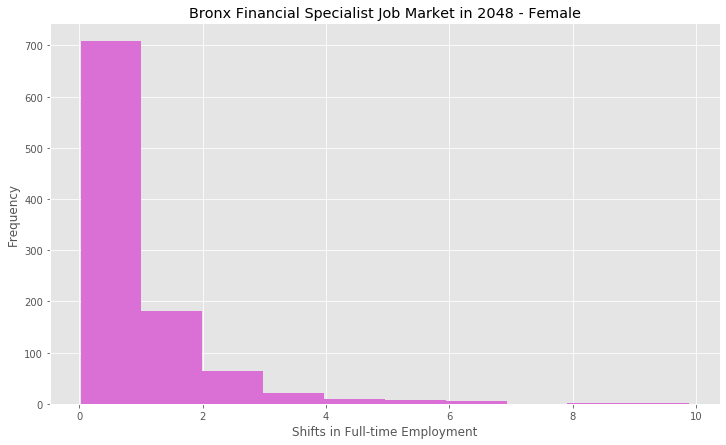

In [204]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
fig_hist_bronx = plt.figure()
ending_cumulative_moves_bronx.plot(kind='hist', bins=10, color = 'orchid', 
                             title='Bronx Financial Specialist Job Market in 2048 - Female', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.show()

In [205]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
confidence_interval_bronx = ending_cumulative_moves_bronx.quantile(q=[0.025, 0.975])
confidence_interval_bronx

0.025    0.063669
0.975    3.879247
Name: 30, dtype: float64

In [206]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative moves ranges
ending_cumulative_moves_bronx.value_counts(bins=10) / len(ending_cumulative_moves_bronx)

(0.008209999999999999, 1.006]    0.708
(1.006, 1.993]                   0.181
(1.993, 2.98]                    0.064
(2.98, 3.967]                    0.022
(3.967, 4.954]                   0.010
(4.954, 5.941]                   0.007
(5.941, 6.928]                   0.005
(7.915, 8.902]                   0.002
(8.902, 9.889]                   0.001
(6.928, 7.915]                   0.000
Name: 30, dtype: float64

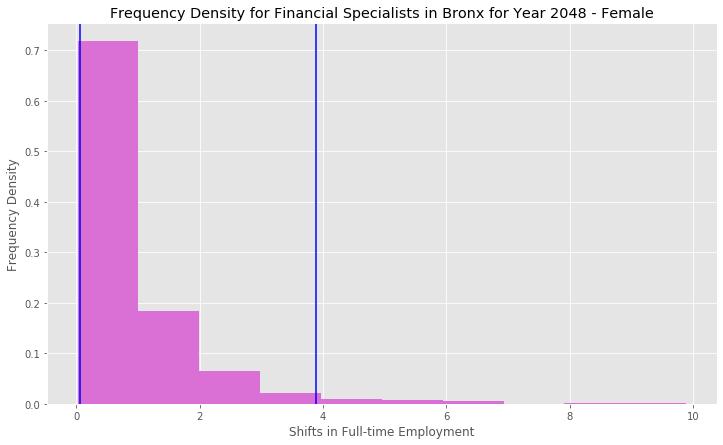

In [207]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_cum_moves_bronx = plt.figure()
ending_cumulative_moves_bronx.plot(kind='hist', density=True, bins=10, color = 'orchid', 
                             title='Frequency Density for Financial Specialists in Bronx for Year 2048 - Female', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(confidence_interval_bronx.iloc[0], color='blue')
plt.axvline(confidence_interval_bronx.iloc[1], color='blue')
plt.show()

In [208]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
tenth_cumulative_moves_bronx = bronx_employed_cumulative_moves.iloc[-20, :]
tenth_cumulative_moves_bronx.head()

0    0.853062
1    1.763166
2    1.014608
3    0.340676
4    0.311242
Name: 11, dtype: float64

In [209]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
tenth_confidence_interval_bronx = tenth_cumulative_moves_bronx.quantile(q=[0.025, 0.975])
tenth_confidence_interval_bronx

0.025    0.219423
0.975    2.642956
Name: 11, dtype: float64

In [210]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative moves ranges
tenth_cumulative_moves_bronx.value_counts(bins=10) / len(tenth_cumulative_moves_bronx)

(0.515, 0.978]                   0.362
(0.047099999999999996, 0.515]    0.226
(0.978, 1.44]                    0.216
(1.44, 1.903]                    0.107
(1.903, 2.365]                   0.049
(2.365, 2.828]                   0.023
(2.828, 3.29]                    0.006
(4.215, 4.678]                   0.004
(3.29, 3.753]                    0.004
(3.753, 4.215]                   0.003
Name: 11, dtype: float64

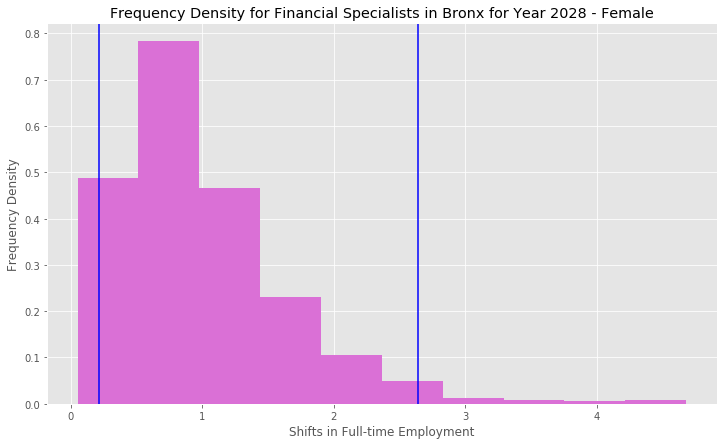

In [211]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_tenth_cum_moves_bronx = plt.figure()
tenth_cumulative_moves_bronx.plot(kind='hist', density=True, bins=10, color = 'orchid', 
                             title='Frequency Density for Financial Specialists in Bronx for Year 2028 - Female', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(tenth_confidence_interval_bronx.iloc[0], color='blue')
plt.axvline(tenth_confidence_interval_bronx.iloc[1], color='blue')
plt.show()

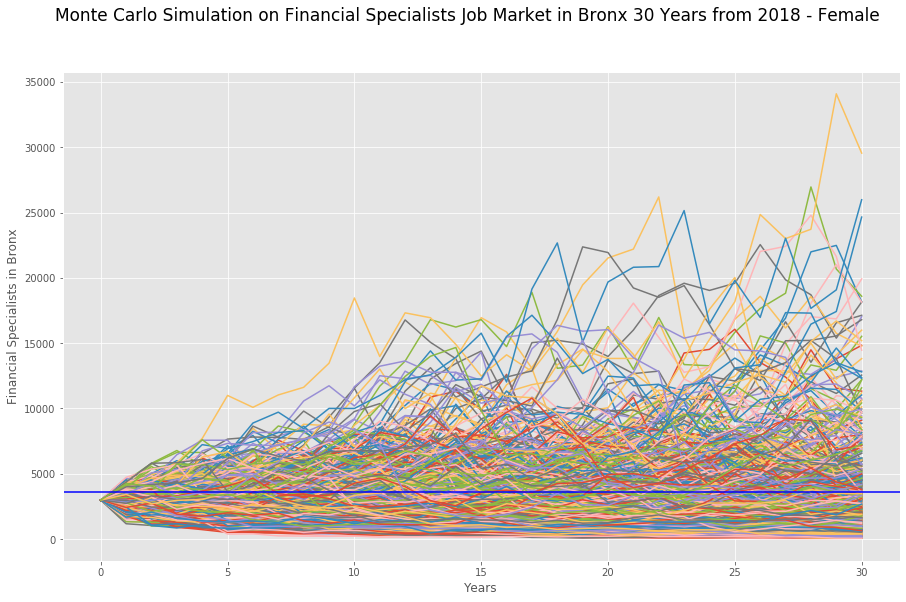

In [212]:
# Set initial investment
initial_employment_bronx = financial_bronx_female_last 

fig_finance_bronx = plt.figure(figsize=(15,9))
fig_finance_bronx.suptitle('Monte Carlo Simulation on Financial Specialists Job Market in Bronx 30 Years from 2018 - Female', fontsize=17)
plt.plot(bronx_employed_cumulative_moves*2_988)
#plt.axhline(y = financial_bronx_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_bronx_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Bronx')
plt.show()

In [213]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
employment_gnl_lower_bound_bronx = initial_employment_bronx * confidence_interval_bronx.iloc[0]
employment_gnl_upper_bound_bronx = initial_employment_bronx * confidence_interval_bronx.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_bronx:,.0f}k in female financial specialists"
      f" in Bronx over the next 30 years will end within in the range of"
      f" {employment_gnl_lower_bound_bronx:,.0f}k and {employment_gnl_upper_bound_bronx:,.0f}k.")

There is a 95% chance that an initial employment of 3,640k in female financial specialists in Bronx over the next 30 years will end within in the range of 232k and 14,120k.


In [243]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
tenth_employment_gnl_lower_bound_bronx = initial_employment_bronx * tenth_confidence_interval_bronx.iloc[0]
tenth_employment_gnl_upper_bound_bronx = initial_employment_bronx * tenth_confidence_interval_bronx.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_bronx:,.0f}k in female financial specialists"
      f" in Bronx over the next 10 years will end within in the range of"
      f" {tenth_employment_gnl_lower_bound_bronx:,.0f}k and {tenth_employment_gnl_upper_bound_bronx:,.0f}k.")

There is a 95% chance that an initial employment of 3,640k in female financial specialists in Bronx over the next 10 years will end within in the range of 799k and 9,620k.


In [216]:
employed_trajectories_bronx = initial_employment_bronx * bronx_employed_cumulative_moves.quantile(q=[0.05, 0.5, 0.95], axis='columns', numeric_only=True).T
employed_trajectories_bronx.columns = ['Lower 5%', 'Median', 'Upper 5%']
employed_trajectories_bronx

Lower 5%       Median      Upper 5%
0   3640.000000  3640.000000   3640.000000
1   2509.596726  3638.182635   4794.745852
2   2173.791124  3565.801285   5241.665373
3   1954.562713  3485.720015   5682.214014
4   1698.322722  3383.917524   6070.228978
5   1466.406559  3395.720640   6441.904981
6   1312.909678  3259.977348   6582.567345
7   1223.793361  3256.565421   6868.905096
8   1219.655882  3186.614333   6913.283611
9   1155.093585  3092.901753   7515.401425
10  1071.899939  3075.192146   7761.794554
11  1011.921842  3036.271042   8218.763707
12   922.079774  2991.160173   8386.464288
13   886.905229  2831.123219   8616.483792
14   821.006201  2794.699169   8863.355753
15   760.883176  2724.479236   9163.028839
16   756.256540  2722.109876   8986.085448
17   777.956626  2603.365820   8978.679159
18   709.340685  2611.098830   8762.965268
19   651.923723  2523.634875   8932.405621
20   615.864440  2546.176573   9199.218752
21   627.047119  2453.117233   9558.375749
22   549.407461  2352.469850  10065.878284
23   509.820122  2362.344894   9815.186178
24   485.828643  2336.518891   9719.544470
25   442.882132  2304.449927   9819.148809
26   423.184896  2178.242389  10045.049409
27   381.382322  2167.382414  10616.270466
28   375.895490  2128.178685  11071.568080
29   330.583141  2075.231189  10695.384070
30   319.253178  2022.348074  10784.518319

<Figure size 432x288 with 0 Axes>

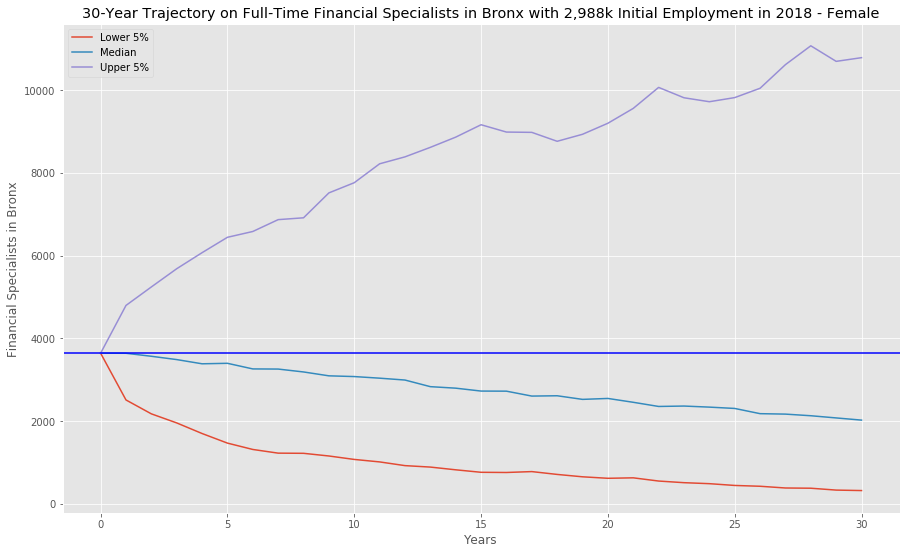

In [308]:
ax_cum_employed_bronx = plt.figure()
employed_trajectories_bronx.plot(title="30-Year Trajectory on Full-Time Financial Specialists in Bronx with 2,988k Initial Employment in 2018 - Female",
                          figsize=(15, 9)),
#plt.axhline(y = financial_bronx_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_bronx_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Bronx')
plt.show()

### Monte Carlo Simulation on Full-Time Financial Specialists in Brooklyn Over 30 Years Starting from 2018

In [219]:
df_brooklyn = financial_specialists_Brooklyn
df_brooklyn

Financial_specialists_male  \
County Year Name                                                 
047    2010 Kings County, New York                     10578.0   
       2011 Kings County, New York                     12407.0   
       2012 Kings County, New York                     10900.0   
       2013 Kings County, New York                     10765.0   
       2014 Kings County, New York                     11821.0   
       2015 Kings County, New York                     10096.0   
       2016 Kings County, New York                     11162.0   
       2017 Kings County, New York                     11608.0   
       2018 Kings County, New York                     11139.0   

                                    Financial_specialists_female  
County Year Name                                                  
047    2010 Kings County, New York                       10787.0  
       2011 Kings County, New York                        9384.0  
       2012 Kings County, New York                       11310.0  
       2013 Kings County, New York                       11266.0  
       2014 Kings County, New York                        8698.0  
       2015 Kings County, New York                       11658.0  
       2016 Kings County, New York                       10285.0  
       2017 Kings County, New York                       11816.0  
       2018 Kings County, New York                       13903.0

In [220]:
# Use the `pct_change` function to calculate daily returns of `male` and `female`.
annual_moves_brooklyn = df_brooklyn.pct_change().fillna(0)
annual_moves_brooklyn

Financial_specialists_male  \
County Year Name                                                 
047    2010 Kings County, New York                    0.000000   
       2011 Kings County, New York                    0.172906   
       2012 Kings County, New York                   -0.121464   
       2013 Kings County, New York                   -0.012385   
       2014 Kings County, New York                    0.098096   
       2015 Kings County, New York                   -0.145927   
       2016 Kings County, New York                    0.105586   
       2017 Kings County, New York                    0.039957   
       2018 Kings County, New York                   -0.040403   

                                    Financial_specialists_female  
County Year Name                                                  
047    2010 Kings County, New York                      0.000000  
       2011 Kings County, New York                     -0.130064  
       2012 Kings County, New York                      0.205243  
       2013 Kings County, New York                     -0.003890  
       2014 Kings County, New York                     -0.227942  
       2015 Kings County, New York                      0.340308  
       2016 Kings County, New York                     -0.117773  
       2017 Kings County, New York                      0.148858  
       2018 Kings County, New York                      0.176625

In [221]:
# Use the `mean` function to calculate the mean of market shifts for `male` and `female`, respectively
avg_annual_moves_financial_brooklyn_male = annual_moves_brooklyn.mean()['Financial_specialists_male']
avg_annual_moves_financial_brooklyn_female = annual_moves_brooklyn.mean()['Financial_specialists_female']
avg_annual_moves_financial_brooklyn_male

0.01070735087759309

In [222]:
avg_annual_moves_financial_brooklyn_female

0.0434848383701982

In [223]:
# Use the `std` function to calculate the standard deviation of market moves for `male` and `female`, respectively
std_dev_annual_moves_financial_brooklyn_male = annual_moves_brooklyn.std()['Financial_specialists_male']
std_dev_annual_moves_financial_brooklyn_female = annual_moves_brooklyn.std()['Financial_specialists_female']
std_dev_annual_moves_financial_brooklyn_male

0.1055144120259476

In [224]:
std_dev_annual_moves_financial_brooklyn_female

0.1860883242930192

In [225]:
# Set number of simulations and trading days
num_simulations = 1000
num_years = 30

# Set last employment figures of `Software_devops_male` and `Software_devops_female`
financial_brooklyn_male_last  = df_brooklyn['Financial_specialists_male'][-1]
financial_brooklyn_female_last = df_brooklyn['Financial_specialists_female'][-1]
# financial_specialists_female_last = df['Financial_specialists_female'][-1]

# Initialize empty DataFrame to hold simulated employment data for each simulation
simulated_brooklyn_employed_df = pd.DataFrame()
brooklyn_employed_cumulative_moves = pd.DataFrame()

# Run the simulation of projecting employment for the next 30 years, `1000` times
for n in range(num_simulations):
    
    count = 0
    
    simulated_financial_specialist_brooklyn_male = []
    simulated_financial_specialist_brooklyn_female = []

    # Initialize the simulated prices list with the last employmentdata of `Software_devops_male` and `Software_devops_female`
    simulated_financial_specialists_brooklyn_male = [financial_brooklyn_male_last]
    simulated_financial_specialists_brooklyn_female = [financial_brooklyn_female_last]
    
            
    # Simulate the returns for 30 years
    for i in range(num_years):
        
        if count == 30:
            break
            
        simulated_financial_specialist_brooklyn_male = simulated_financial_specialists_brooklyn_male[count] * (1 + np.random.normal(avg_annual_moves_financial_brooklyn_male, std_dev_annual_moves_financial_brooklyn_male))
        simulated_financial_specialist_brooklyn_female = simulated_financial_specialists_brooklyn_female[count] * (1 + np.random.normal(avg_annual_moves_financial_brooklyn_female, std_dev_annual_moves_financial_brooklyn_female))

        simulated_financial_specialists_brooklyn_male.append(simulated_financial_specialist_brooklyn_male)
        simulated_financial_specialists_brooklyn_female.append(simulated_financial_specialist_brooklyn_female)
        
        count += 1
            
    # Append a simulated prices of each simulation to DataFrame
    simulated_brooklyn_employed_df['Financial_specialists_male'] = simulated_financial_specialists_brooklyn_male
    simulated_brooklyn_employed_df['Financial_specialists_female'] = simulated_financial_specialists_brooklyn_female
    
    # Calculate the daily returns of simulated prices
    simulated_brooklyn_employed_moves = simulated_brooklyn_employed_df.pct_change()
    
    # Set the portfolio weights (0% male; 100% female)
    weights = [0.0, 1.0]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    brooklyn_employed_annual_moves = simulated_brooklyn_employed_moves.dot(weights)
    
    # Calculate the normalized, cumulative return series
    brooklyn_employed_cumulative_moves[n] = (1 + brooklyn_employed_annual_moves.fillna(0)).cumprod()

# Print records from the DataFrame
brooklyn_employed_cumulative_moves

0         1         2         3         4         5         6    \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   1.146538  1.196826  0.907548  1.178269  1.143420  1.092325  1.401470   
2   1.358247  1.094840  0.919429  1.292950  1.138565  1.041785  1.480326   
3   1.403588  1.164128  1.156777  1.544729  0.971718  1.106913  1.571475   
4   1.282175  1.345078  1.288122  1.825642  1.002291  1.008091  1.684096   
5   1.684630  1.016747  0.837103  1.979885  1.155043  1.186477  1.932290   
6   2.151536  1.250378  0.791564  2.029197  1.295894  1.259962  1.322496   
7   2.517359  1.135888  0.711291  2.634016  1.407390  1.469425  1.299139   
8   1.748846  1.192424  0.743021  3.248057  1.104991  1.716736  1.278115   
9   1.591950  1.542454  0.606948  3.434137  1.202123  1.386529  1.511177   
10  1.812920  0.837481  0.615265  4.003598  1.369740  1.782963  2.089351   
11  1.923476  1.117225  0.589354  5.393750  1.920016  2.231129  2.398934   
12  1.505283  1.403076  0.854582  4.041555  1.819808  2.179937  3.171880   
13  1.603873  1.413533  0.620048  3.309454  1.882203  1.528678  2.531217   
14  1.070350  1.807074  0.628809  2.450186  1.858991  1.965002  1.362836   
15  1.229737  1.799268  0.580609  3.338834  1.429924  1.643591  1.546354   
16  1.008893  2.096875  0.506055  3.618373  1.420785  1.249922  1.342618   
17  0.982175  2.244602  0.849278  2.135347  1.380295  1.388615  1.194306   
18  1.015222  2.037129  0.750969  2.664137  1.140243  2.075423  1.290304   
19  1.183412  1.774820  0.665768  1.817580  0.933727  2.541250  1.109551   
20  1.468691  2.358670  0.717320  1.930214  0.804963  2.772764  1.324886   
21  1.311884  2.976982  0.931318  2.281318  0.795056  2.822178  0.917619   
22  1.551442  2.793607  0.901939  2.288780  1.009632  2.924658  0.793651   
23  1.600647  2.116626  1.116856  2.609058  1.171315  2.289501  1.030832   
24  1.527005  2.416889  0.983446  3.115846  1.051668  2.650964  0.818835   
25  1.181332  2.756885  1.020727  3.825718  1.179805  2.680712  0.827323   
26  1.941341  2.767527  1.199886  3.490474  1.339556  3.277301  0.775561   
27  2.809004  3.359679  1.387565  3.998411  1.627467  2.905446  0.876869   
28  3.496781  3.766123  0.940010  4.003040  1.447660  3.532971  0.757927   
29  4.572207  4.304982  1.101609  5.129188  2.104216  3.408724  0.716397   
30  5.725072  4.374069  1.159903  5.489728  2.378224  3.655878  0.868816   

         7         8         9    ...       990        991       992  \
0   1.000000  1.000000  1.000000  ...  1.000000   1.000000  1.000000   
1   1.201218  1.182381  1.314935  ...  1.213523   0.907408  0.956784   
2   0.998177  1.429520  0.968202  ...  1.495758   1.058096  1.173627   
3   1.182616  1.965599  0.889017  ...  1.184870   0.751826  1.214872   
4   0.943916  1.681083  0.972154  ...  0.859914   0.820411  1.399513   
5   1.319483  1.498621  0.828695  ...  0.718006   0.915953  1.931167   
6   1.396660  1.958585  0.838914  ...  0.761840   1.080148  1.747037   
7   1.515135  1.999435  1.020853  ...  0.723710   0.899132  2.145874   
8   1.077472  2.458731  0.936519  ...  0.568992   1.128185  1.812936   
9   1.061529  2.161849  0.962484  ...  0.476822   1.313326  1.997910   
10  1.224633  2.538556  1.165901  ...  0.496955   1.701594  2.156589   
11  1.308104  2.089284  1.081633  ...  0.572261   2.097167  1.990079   
12  1.461105  2.306390  1.398444  ...  0.688930   2.213840  2.520702   
13  1.769454  1.775551  1.300136  ...  0.711214   3.391841  2.626489   
14  1.818809  1.878116  1.475349  ...  0.571263   5.140595  2.375912   
15  2.047205  2.525856  1.212397  ...  0.539018   6.086973  2.454374   
16  2.332483  3.050446  1.650293  ...  0.543721   5.313325  1.915789   
17  2.767444  3.388403  1.211048  ...  0.551998   5.938277  2.081944   
18  2.303488  4.747462  1.085386  ...  0.537952   6.599042  2.122297   
19  2.576072  3.533306  0.983565  ...  0.490398   7.000586  3.218606   
20  2.398337  4.115279  0.997398  ...  0.511252   6.839272  4.04

<Figure size 432x288 with 0 Axes>

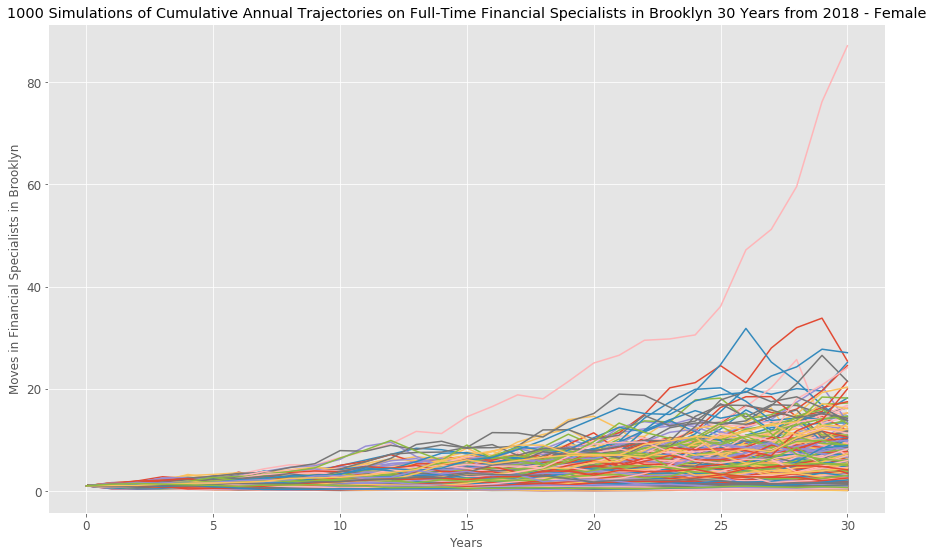

In [226]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the employment on software developers based on a year
monte_carlo_cum_moves_brooklyn = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Financial Specialists in Brooklyn 30 Years from 2018 - Female"
brooklyn_employed_cumulative_moves.plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Moves in Financial Specialists in Brooklyn')
plt.show()

In [227]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
ending_cumulative_moves_brooklyn = brooklyn_employed_cumulative_moves.iloc[-1, :]
ending_cumulative_moves_brooklyn.head()

0    5.725072
1    4.374069
2    1.159903
3    5.489728
4    2.378224
Name: 30, dtype: float64

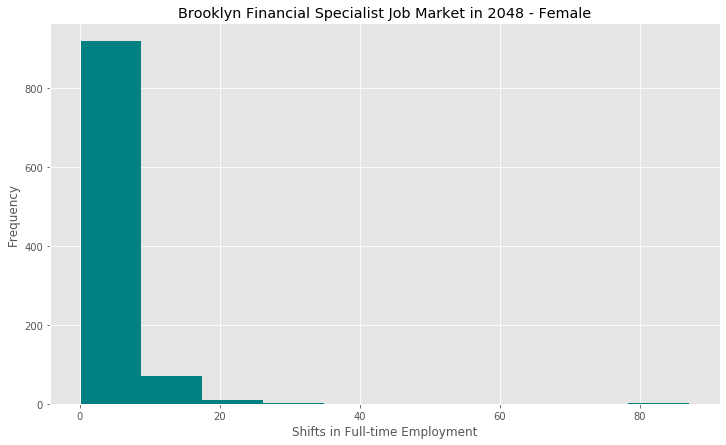

In [229]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
fig_hist_brooklyn = plt.figure()
ending_cumulative_moves_brooklyn.plot(kind='hist', bins=10, color = 'Teal', 
                             title='Brooklyn Financial Specialist Job Market in 2048 - Female', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.show()

In [230]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
confidence_interval_brooklyn = ending_cumulative_moves_brooklyn.quantile(q=[0.025, 0.975])
confidence_interval_brooklyn

0.025     0.250108
0.975    14.239099
Name: 30, dtype: float64

In [231]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative employment ranges
ending_cumulative_moves_brooklyn.value_counts(bins=10) / len(ending_cumulative_moves_brooklyn)

(0.0188, 8.807]     0.917
(8.807, 17.507]     0.071
(17.507, 26.207]    0.010
(78.408, 87.108]    0.001
(26.207, 34.907]    0.001
(69.707, 78.408]    0.000
(61.007, 69.707]    0.000
(52.307, 61.007]    0.000
(43.607, 52.307]    0.000
(34.907, 43.607]    0.000
Name: 30, dtype: float64

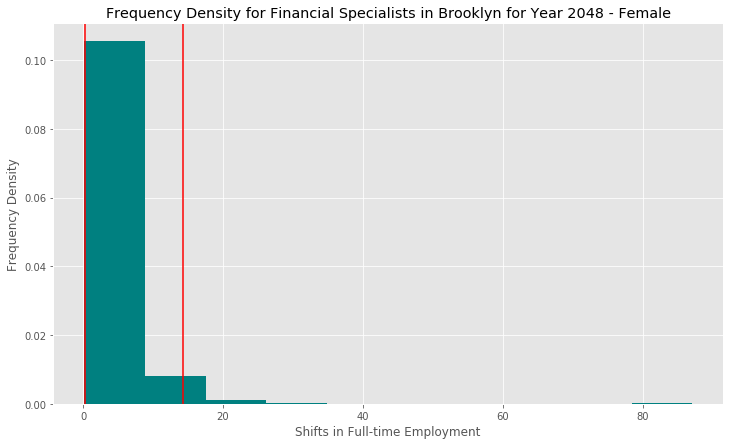

In [232]:
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 95% confidence interval
hist_cum_moves_brooklyn = plt.figure()
ending_cumulative_moves_brooklyn.plot(kind='hist', density=True, bins=10, color = 'teal', 
                             title='Frequency Density for Financial Specialists in Brooklyn for Year 2048 - Female', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(confidence_interval_brooklyn.iloc[0], color='red')
plt.axvline(confidence_interval_brooklyn.iloc[1], color='red')
plt.show()

In [233]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
tenth_cumulative_moves_brooklyn = brooklyn_employed_cumulative_moves.iloc[-20, :]
tenth_cumulative_moves_brooklyn.head()

0    1.923476
1    1.117225
2    0.589354
3    5.393750
4    1.920016
Name: 11, dtype: float64

In [234]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
tenth_confidence_interval_brooklyn = tenth_cumulative_moves_brooklyn.quantile(q=[0.025, 0.975])
tenth_confidence_interval_brooklyn

0.025    0.366896
0.975    4.381260
Name: 11, dtype: float64

In [235]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative employment ranges
tenth_cumulative_moves_brooklyn.value_counts(bins=10) / len(tenth_cumulative_moves_brooklyn)

(0.971, 1.835]     0.386
(0.0975, 0.971]    0.297
(1.835, 2.698]     0.204
(2.698, 3.562]     0.071
(3.562, 4.426]     0.019
(4.426, 5.289]     0.014
(5.289, 6.153]     0.005
(7.88, 8.744]      0.002
(7.017, 7.88]      0.002
(6.153, 7.017]     0.000
Name: 11, dtype: float64

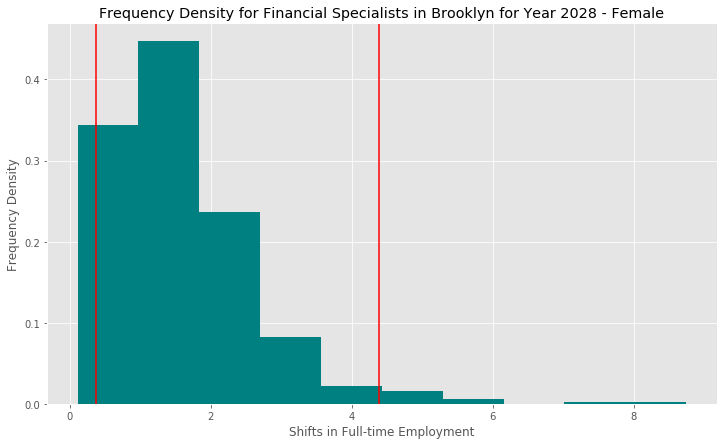

In [237]:
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 95% confidence interval
hist_tenth_cum_moves_brooklyn = plt.figure()
tenth_cumulative_moves_brooklyn.plot(kind='hist', density=True, bins=10, color = 'teal', 
                             title='Frequency Density for Financial Specialists in Brooklyn for Year 2028 - Female', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(tenth_confidence_interval_brooklyn.iloc[0], color='red')
plt.axvline(tenth_confidence_interval_brooklyn.iloc[1], color='red')
plt.show()

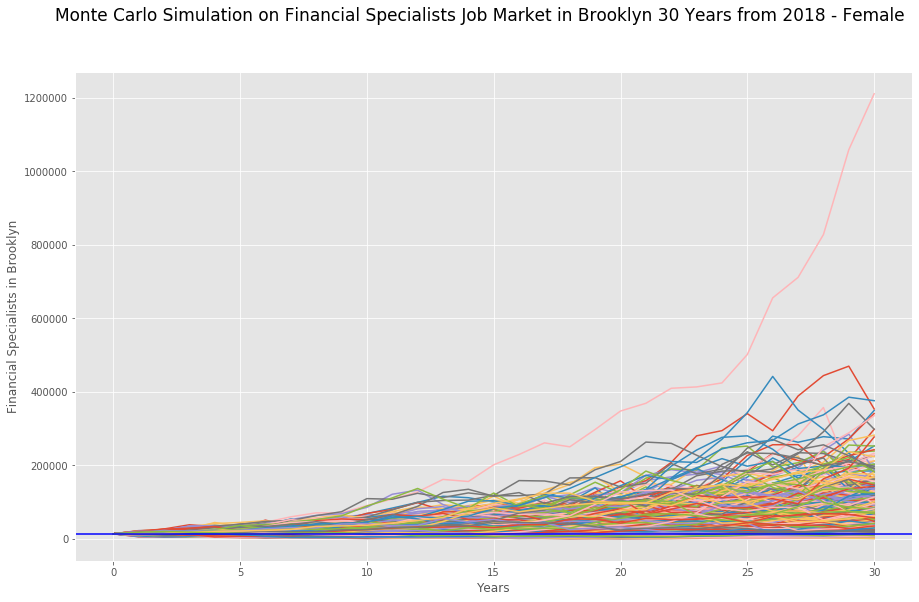

In [239]:
# Set initial employment
initial_employment_brooklyn = financial_brooklyn_female_last 

# Plot scaled monte-carlo simulation for Brooklyn job market
fig_finance_brooklyn = plt.figure(figsize=(15,9))
fig_finance_brooklyn.suptitle('Monte Carlo Simulation on Financial Specialists Job Market in Brooklyn 30 Years from 2018 - Female', fontsize=17)
plt.plot(brooklyn_employed_cumulative_moves * initial_employment_brooklyn)
#plt.axhline(y = financial_brooklyn_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_brooklyn_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Brooklyn')
plt.show()

In [240]:
# Calculate employment gain/loss of lower and upper bound cumulative portfolio returns
employment_gnl_lower_bound_brooklyn = initial_employment_brooklyn * confidence_interval_brooklyn.iloc[0]
employment_gnl_upper_bound_brooklyn = initial_employment_brooklyn * confidence_interval_brooklyn.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_brooklyn:,.0f}k in female financial specialists"
      f" in Brooklyn over the next 30 years will end within in the range of"
      f" {employment_gnl_lower_bound_brooklyn:,.0f}k and {employment_gnl_upper_bound_brooklyn:,.0f}k.")

There is a 95% chance that an initial employment of 13,903k in female financial specialists in Brooklyn over the next 30 years will end within in the range of 3,477k and 197,966k.


In [245]:
# Calculate employment gain/loss of lower and upper bound cumulative portfolio returns
tenth_employment_gnl_lower_bound_brooklyn = initial_employment_brooklyn * tenth_confidence_interval_brooklyn.iloc[0]
tenth_employment_gnl_upper_bound_brooklyn = initial_employment_brooklyn * tenth_confidence_interval_brooklyn.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_brooklyn:,.0f}k in female financial specialists"
      f" in Brooklyn over the next 10 years will end within in the range of"
      f" {tenth_employment_gnl_lower_bound_brooklyn:,.0f}k and {tenth_employment_gnl_upper_bound_brooklyn:,.0f}k.")

There is a 95% chance that an initial employment of 13,903k in female financial specialists in Brooklyn over the next 10 years will end within in the range of 5,101k and 60,913k.


In [246]:
employed_trajectories_brooklyn = initial_employment_brooklyn * brooklyn_employed_cumulative_moves.quantile(q=[0.05, 0.5, 0.95], axis='columns', numeric_only=True).T
employed_trajectories_brooklyn.columns = ['Lower 5%', 'Median', 'Upper 5%']
employed_trajectories_brooklyn

Lower 5%        Median       Upper 5%
0   13903.000000  13903.000000   13903.000000
1   10356.414734  14749.408078   18930.760423
2    9010.375622  15093.483197   21600.289212
3    8420.198036  15355.768733   24187.038279
4    7706.885483  16011.556729   26606.524078
5    7513.451926  16058.650503   29597.326664
6    6979.184984  16854.532500   33208.443621
7    6548.714044  17119.758452   34840.065310
8    6385.754996  17574.620596   38955.503466
9    6270.219566  17687.529773   42478.581743
10   6305.223866  18179.702445   44217.503308
11   6062.715134  19135.345682   45371.096816
12   5814.287763  19418.269136   49057.924478
13   5960.340610  19450.038467   52387.640542
14   6141.227339  20245.388849   57472.510508
15   6036.944861  21161.018112   63423.127213
16   5974.911061  21462.943202   66837.538099
17   5475.818218  21828.815042   71051.704000
18   5583.763893  22190.630129   75471.597253
19   5208.169310  22874.891936   81024.733433
20   5367.271989  23374.119258   89332.207271
21   5492.186301  23867.631667   90789.901201
22   5276.726947  24126.576295   99040.226927
23   5479.933287  24790.402533  112299.662885
24   4797.109756  26083.608379  116207.151053
25   5226.219425  27328.550447  119189.007114
26   5372.323411  27637.293028  121637.226685
27   5274.593314  27201.461737  129289.166852
28   5154.152663  28551.840080  141735.242521
29   5325.379531  29213.304565  145621.135131
30   5038.938526  30338.027192  147769.010898

<Figure size 432x288 with 0 Axes>

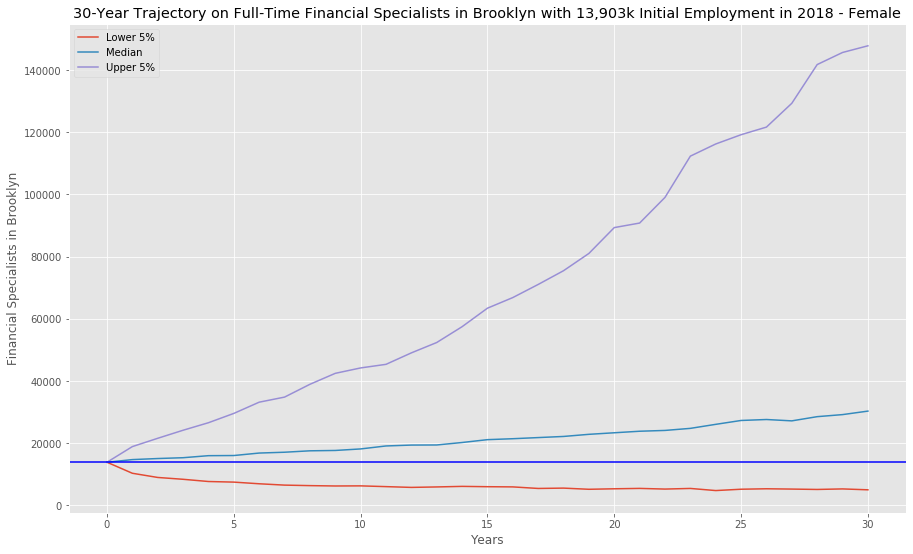

In [305]:
ax_cum_employed_brooklyn = plt.figure()
employed_trajectories_brooklyn.plot(title="30-Year Trajectory on Full-Time Financial Specialists in Brooklyn with 13,903k Initial Employment in 2018 - Female",
                          figsize=(15, 9))
#plt.axhline(y = financial_brooklyn_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_brooklyn_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Brooklyn')
plt.show()

### Monte Carlo Simulation on Full-Time Financial Specialists in Queens Over 30 Years Starting from 2018

In [248]:
df_queens = financial_specialists_Queens
df_queens

Financial_specialists_male  \
County Year Name                                                  
081    2010 Queens County, New York                     12474.0   
       2011 Queens County, New York                     12283.0   
       2012 Queens County, New York                     12352.0   
       2013 Queens County, New York                     12428.0   
       2014 Queens County, New York                     11948.0   
       2015 Queens County, New York                     13864.0   
       2016 Queens County, New York                     12805.0   
       2017 Queens County, New York                     14777.0   
       2018 Queens County, New York                     11494.0   

                                     Financial_specialists_female  
County Year Name                                                   
081    2010 Queens County, New York                       13008.0  
       2011 Queens County, New York                       12396.0  
       2012 Queens County, New York                       12281.0  
       2013 Queens County, New York                       14374.0  
       2014 Queens County, New York                       13265.0  
       2015 Queens County, New York                       14109.0  
       2016 Queens County, New York                       13697.0  
       2017 Queens County, New York                       13611.0  
       2018 Queens County, New York                       13281.0

In [249]:
# Use the `pct_change` function to calculate daily returns of `male` and `female`.
annual_moves_queens = df_queens.pct_change().fillna(0)
annual_moves_queens

Financial_specialists_male  \
County Year Name                                                  
081    2010 Queens County, New York                    0.000000   
       2011 Queens County, New York                   -0.015312   
       2012 Queens County, New York                    0.005618   
       2013 Queens County, New York                    0.006153   
       2014 Queens County, New York                   -0.038622   
       2015 Queens County, New York                    0.160362   
       2016 Queens County, New York                   -0.076385   
       2017 Queens County, New York                    0.154002   
       2018 Queens County, New York                   -0.222170   

                                     Financial_specialists_female  
County Year Name                                                   
081    2010 Queens County, New York                      0.000000  
       2011 Queens County, New York                     -0.047048  
       2012 Queens County, New York                     -0.009277  
       2013 Queens County, New York                      0.170426  
       2014 Queens County, New York                     -0.077153  
       2015 Queens County, New York                      0.063626  
       2016 Queens County, New York                     -0.029201  
       2017 Queens County, New York                     -0.006279  
       2018 Queens County, New York                     -0.024245

In [250]:
# Use the `mean` function to calculate the mean of market shifts for `male` and `female`, respectively
avg_annual_moves_financial_queens_male = annual_moves_queens.mean()['Financial_specialists_male']
avg_annual_moves_financial_queens_female = annual_moves_queens.mean()['Financial_specialists_female']
avg_annual_moves_financial_queens_male

-0.0029282782346636343

In [251]:
avg_annual_moves_financial_queens_female

0.004538725855711283

In [252]:
# Use the `std` function to calculate the standard deviation of market moves for `male` and `female`, respectively
std_dev_annual_moves_financial_queens_male = annual_moves_queens.std()['Financial_specialists_male']
std_dev_annual_moves_financial_queens_female = annual_moves_queens.std()['Financial_specialists_female']
std_dev_annual_moves_financial_queens_male

0.11529577070807671

In [253]:
std_dev_annual_moves_financial_queens_female

0.07300685227824968

In [255]:
# Set number of simulations and trading days
num_simulations = 1000
num_years = 30

# Set last employment figures of `Software_devops_male` and `Software_devops_female`
financial_queens_male_last  = df_queens['Financial_specialists_male'][-1]
financial_queens_female_last = df_queens['Financial_specialists_female'][-1]
# financial_specialists_female_last = df['Financial_specialists_female'][-1]

# Initialize empty DataFrame to hold simulated employment data for each simulation
simulated_queens_employed_df = pd.DataFrame()
queens_employed_cumulative_moves = pd.DataFrame()

# Run the simulation of projecting employment for the next 30 years, `1000` times
for n in range(num_simulations):
    
    count = 0
    
    simulated_financial_specialist_queens_male = []
    simulated_financial_specialist_queens_female = []

    # Initialize the simulated prices list with the last employmentdata of `Software_devops_male` and `Software_devops_female`
    simulated_financial_specialists_queens_male = [financial_queens_male_last]
    simulated_financial_specialists_queens_female = [financial_queens_female_last]
    
            
    
    # Simulate the returns for 30 years
    for i in range(num_years):
        
        if count == 30:
            break
            
        simulated_financial_specialist_queens_male = simulated_financial_specialists_queens_male[count] * (1 + np.random.normal(avg_annual_moves_financial_queens_male, std_dev_annual_moves_financial_queens_male))
        simulated_financial_specialist_queens_female = simulated_financial_specialists_queens_female[count] * (1 + np.random.normal(avg_annual_moves_financial_queens_female, std_dev_annual_moves_financial_queens_female))

        simulated_financial_specialists_queens_male.append(simulated_financial_specialist_queens_male)
        simulated_financial_specialists_queens_female.append(simulated_financial_specialist_queens_female)
        
        count += 1
            
    # Append a simulated prices of each simulation to DataFrame
    simulated_queens_employed_df['Financial_specialists_male'] = simulated_financial_specialists_queens_male
    simulated_queens_employed_df['Financial_specialists_female'] = simulated_financial_specialists_queens_female
    
    # Calculate the daily returns of simulated prices
    simulated_queens_employed_moves = simulated_queens_employed_df.pct_change()
    
    # Set the portfolio weights (0% male; 100% female)
    weights = [0.0, 1.0]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    queens_employed_annual_moves = simulated_queens_employed_moves.dot(weights)
    
    # Calculate the normalized, cumulative return series
    queens_employed_cumulative_moves[n] = (1 + queens_employed_annual_moves.fillna(0)).cumprod()

# Print records from the DataFrame
queens_employed_cumulative_moves

0         1         2         3         4         5         6    \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   0.991267  1.048697  1.027769  0.969541  0.950995  0.906424  1.107095   
2   1.039491  1.072943  1.097298  1.042487  0.924006  1.006225  1.030952   
3   0.994923  1.099210  1.100996  1.016305  0.910005  1.004171  0.839304   
4   1.163619  1.094081  1.044148  0.949937  0.936506  1.195566  0.738711   
5   1.153293  1.057066  1.057891  1.067741  0.902181  1.186031  0.658487   
6   1.142883  0.987678  1.082397  1.080688  0.878367  1.214861  0.627092   
7   1.141915  1.021808  1.022654  0.986236  0.878064  1.197807  0.714509   
8   1.096383  0.938913  1.136594  0.929498  0.948988  1.190950  0.758143   
9   1.356492  0.840587  0.997303  0.910755  1.001953  1.263902  0.735217   
10  1.419445  0.802681  1.089370  0.828765  1.085026  1.165269  0.771550   
11  1.329596  0.796858  1.068719  0.861978  1.166949  1.190123  0.783375   
12  1.246845  0.736505  1.050384  0.820572  1.180203  1.171337  0.832500   
13  1.073718  0.917062  1.125062  0.735255  1.118826  1.084950  0.727555   
14  0.962163  0.925322  1.193901  0.800342  1.008921  1.012093  0.736456   
15  0.918427  0.957967  1.264979  0.871767  1.158882  1.013156  0.775850   
16  1.018051  0.801939  1.368990  0.770734  1.119588  0.937519  0.673278   
17  1.055861  0.733515  1.497492  0.811565  1.212731  0.760847  0.630308   
18  1.021659  0.749031  1.517667  0.941568  1.255607  0.799526  0.576006   
19  1.042977  0.770876  1.493270  0.857981  1.182034  0.699235  0.610883   
20  1.001254  0.764507  1.397412  0.881086  0.995198  0.724655  0.652990   
21  0.903663  0.753665  1.368503  0.828019  0.928157  0.657464  0.633763   
22  1.027520  0.753751  1.309588  0.942642  1.008268  0.594710  0.638278   
23  1.065781  0.790012  1.148735  1.011952  0.955125  0.631415  0.688067   
24  0.981810  0.787718  1.141437  1.157876  0.932995  0.650052  0.775387   
25  1.005691  0.803165  1.102218  1.145023  1.006495  0.656468  0.794612   
26  0.964550  0.759347  1.243642  1.238267  0.984047  0.674646  0.816086   
27  1.032688  0.682246  1.447749  1.135148  0.987388  0.691794  0.787258   
28  1.045255  0.664356  1.404779  1.082648  0.919322  0.634877  0.876492   
29  1.192726  0.733890  1.386449  0.999604  0.875991  0.620371  0.985153   
30  1.329275  0.798755  1.475716  0.987580  0.923168  0.574859  1.091240   

         7         8         9    ...       990       991       992       993  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   1.061894  0.829349  0.949146  ...  1.072764  1.072745  0.961789  1.045612   
2   1.018096  0.771059  0.899310  ...  0.957896  1.037696  1.023426  1.134868   
3   0.964474  0.711719  0.918815  ...  0.955161  1.005748  1.037854  1.256510   
4   0.959444  0.667627  0.836521  ...  1.024126  0.972494  1.007218  1.262271   
5   0.927456  0.660899  0.894892  ...  0.899091  1.016666  1.031014  1.256645   
6   0.815984  0.693925  0.988803  ...  0.832320  1.098305  0.993408  1.117315   
7   0.777082  0.659865  1.049161  ...  0.750610  1.194576  1.009055  1.108317   
8   0.866859  0.614181  0.958110  ...  0.827981  1.281467  0.995515  1.077073   
9   0.924403  0.631356  1.000885  ...  0.886510  1.126422  1.041995  1.072606   
10  0.902258  0.634337  0.887116  ...  0.956079  1.143846  1.008139  0.980069   
11  0.894546  0.621637  0.899506  ...  0.930354  1.184061  0.898551  0.928880   
12  0.877262  0.640186  0.881578  ...  0.993914  1.272963  0.757436  0.852351   
13  0.927570  0.720708  0.844884  ...  1.140337  1.218889  0.739809  0.778919   
14  0.906804  0.752026  0.846165  ...  1.178610  1.315179  0.736231  0.809721   
15  1.038833  0.724247  0.857307  ...  1.221006  1.363886  0.659523  0.913103   
16  0.951713  0.729033  0.852523  ...  1.272521  1.345099  0.656182  0.753150   
17  0.920076  0.669865  0.912918  ...  1.426762  1.264840  0.690899  0.763476   
18  0.957810  0.556071  0.962092  ...

<Figure size 432x288 with 0 Axes>

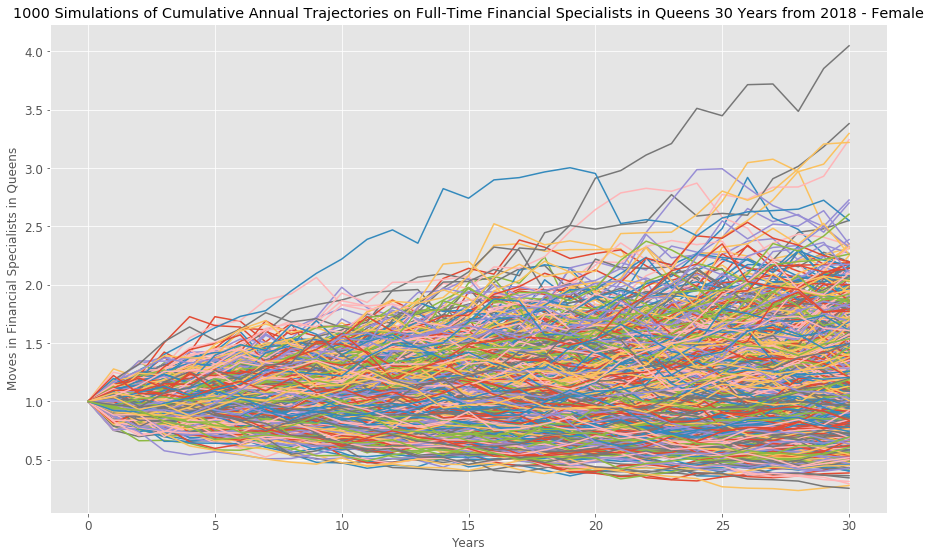

In [256]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the employment on software developers based on a year
monte_carlo_cum_moves_queens = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Financial Specialists in Queens 30 Years from 2018 - Female"
queens_employed_cumulative_moves.plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Moves in Financial Specialists in Queens')
plt.show()

In [257]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
ending_cumulative_moves_queens = queens_employed_cumulative_moves.iloc[-1, :]
ending_cumulative_moves_queens.head()

0    1.329275
1    0.798755
2    1.475716
3    0.987580
4    0.923168
Name: 30, dtype: float64

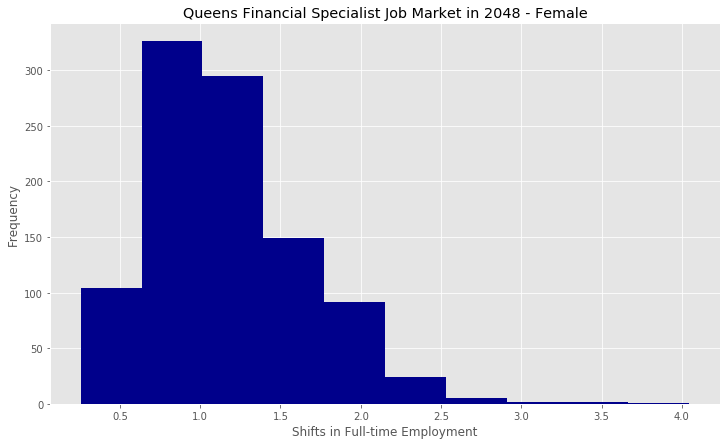

In [259]:
# Use the `plot` function to plot a frequency distribution of simulated ending employment
fig_hist_queens = plt.figure()
ending_cumulative_moves_queens.plot(kind='hist', bins=10, color = 'darkblue', 
                             title='Queens Financial Specialist Job Market in 2048 - Female', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.show()

In [260]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
confidence_interval_queens = ending_cumulative_moves_queens.quantile(q=[0.025, 0.975])
confidence_interval_queens

0.025    0.469887
0.975    2.195796
Name: 30, dtype: float64

In [261]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative moves ranges
ending_cumulative_moves_queens.value_counts(bins=10) / len(ending_cumulative_moves_queens)

(0.634, 1.013]    0.326
(1.013, 1.393]    0.295
(1.393, 1.772]    0.149
(0.25, 0.634]     0.104
(1.772, 2.151]    0.092
(2.151, 2.53]     0.024
(2.53, 2.91]      0.005
(3.289, 3.668]    0.002
(2.91, 3.289]     0.002
(3.668, 4.047]    0.001
Name: 30, dtype: float64

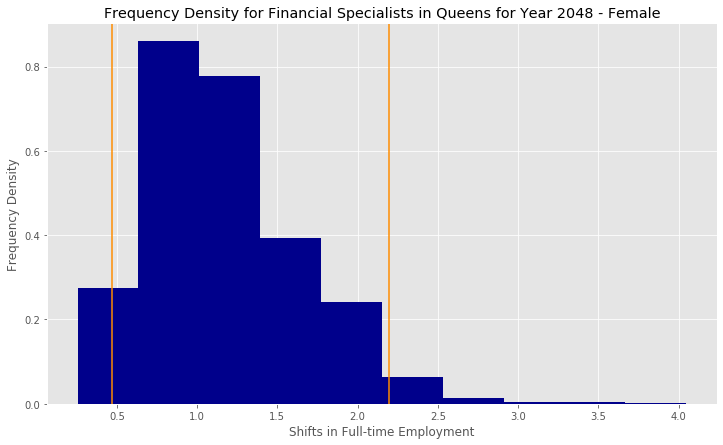

In [262]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_cum_moves_queens = plt.figure()
ending_cumulative_moves_queens.plot(kind='hist', density=True, bins=10, color = 'darkblue', 
                             title='Frequency Density for Financial Specialists in Queens for Year 2048 - Female', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(confidence_interval_queens.iloc[0], color='darkorange')
plt.axvline(confidence_interval_queens.iloc[1], color='darkorange')
plt.show()

In [263]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
tenth_cumulative_moves_queens = queens_employed_cumulative_moves.iloc[-20, :]
tenth_cumulative_moves_queens.head()

0    1.329596
1    0.796858
2    1.068719
3    0.861978
4    1.166949
Name: 11, dtype: float64

In [264]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
tenth_confidence_interval_queens = tenth_cumulative_moves_queens.quantile(q=[0.025, 0.975])
tenth_confidence_interval_queens

0.025    0.613328
0.975    1.610530
Name: 11, dtype: float64

In [265]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative moves ranges
tenth_cumulative_moves_queens.value_counts(bins=10) / len(tenth_cumulative_moves_queens)

(1.016, 1.212]    0.284
(0.819, 1.016]    0.273
(1.212, 1.408]    0.157
(0.623, 0.819]    0.150
(1.408, 1.604]    0.080
(0.424, 0.623]    0.030
(1.604, 1.8]      0.020
(1.8, 1.996]      0.005
(2.193, 2.389]    0.001
(1.996, 2.193]    0.000
Name: 11, dtype: float64

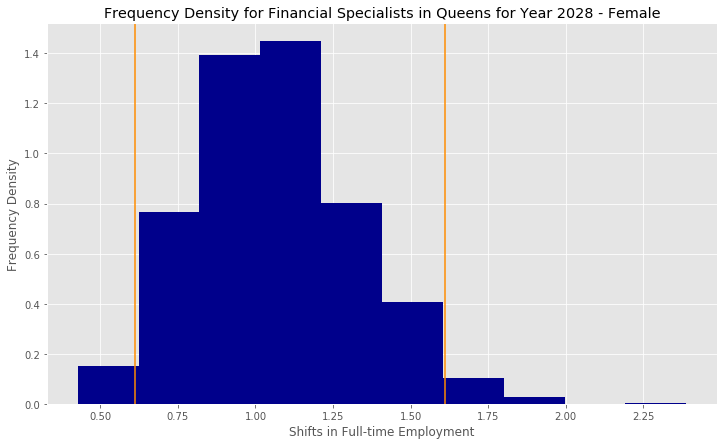

In [266]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_tenth_cum_moves_queens = plt.figure()
tenth_cumulative_moves_queens.plot(kind='hist', density=True, bins=10, color = 'darkblue', 
                             title='Frequency Density for Financial Specialists in Queens for Year 2028 - Female', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(tenth_confidence_interval_queens.iloc[0], color='darkorange')
plt.axvline(tenth_confidence_interval_queens.iloc[1], color='darkorange')
plt.show()

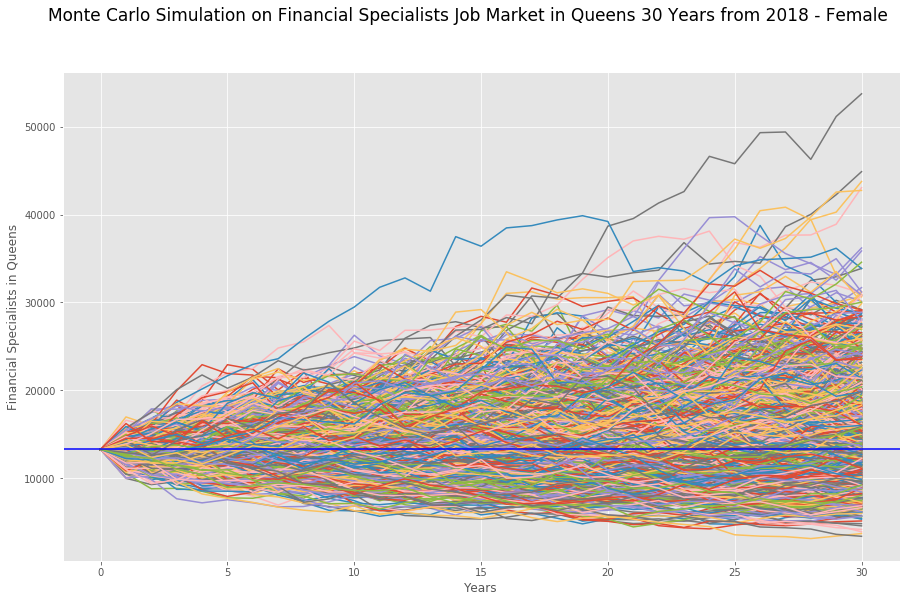

In [268]:
# Set initial employment
initial_employment_queens = financial_queens_female_last 

fig_finance_queens = plt.figure(figsize=(15,9))
fig_finance_queens.suptitle('Monte Carlo Simulation on Financial Specialists Job Market in Queens 30 Years from 2018 - Female', fontsize=17)
plt.plot(queens_employed_cumulative_moves * initial_employment_queens)
#plt.axhline(y = financial_queens_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_queens_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Queens')
plt.show()

In [270]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
employment_gnl_lower_bound_queens = initial_employment_queens * confidence_interval_queens.iloc[0]
employment_gnl_upper_bound_queens = initial_employment_queens * confidence_interval_queens.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_queens:,.0f}k in female financial specialists"
      f" in Queens over the next 30 years will end within in the range of"
      f" {employment_gnl_lower_bound_queens:,.0f}k and {employment_gnl_upper_bound_queens:,.0f}k.")

There is a 95% chance that an initial employment of 13,281k in female financial specialists in Queens over the next 30 years will end within in the range of 6,241k and 29,162k.


In [271]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
tenth_employment_gnl_lower_bound_queens = initial_employment_queens * tenth_confidence_interval_queens.iloc[0]
tenth_employment_gnl_upper_bound_queens = initial_employment_queens * tenth_confidence_interval_queens.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_queens:,.0f}k in female financial specialists"
      f" in Queens over the next 10 years will end within in the range of"
      f" {tenth_employment_gnl_lower_bound_queens:,.0f}k and {tenth_employment_gnl_upper_bound_queens:,.0f}k.")

There is a 95% chance that an initial employment of 13,281k in female financial specialists in Queens over the next 10 years will end within in the range of 8,146k and 21,389k.


In [272]:
employed_trajectories_queens = initial_employment_queens * queens_employed_cumulative_moves.quantile(q=[0.05, 0.5, 0.95], axis='columns', numeric_only=True).T
employed_trajectories_queens.columns = ['Lower 5%', 'Median', 'Upper 5%']
employed_trajectories_queens

Lower 5%        Median      Upper 5%
0   13281.000000  13281.000000  13281.000000
1   11766.423440  13330.033157  14904.854552
2   11019.109803  13354.384379  15798.123704
3   10638.222277  13462.338705  16327.685977
4   10196.878965  13478.092946  17068.058620
5    9904.944395  13498.779541  17422.137487
6    9810.111566  13477.381376  17859.748845
7    9672.948755  13561.108658  18195.714808
8    9521.674300  13663.722713  18726.462442
9    9422.398128  13735.741878  19158.165517
10   9160.040578  13799.080163  19707.702717
11   9031.683851  13850.815786  20256.124244
12   8979.169827  13904.487655  20827.982853
13   8860.992123  13937.262721  21264.188447
14   8760.213249  13841.320486  21390.570812
15   8688.309393  13829.318209  22160.585962
16   8442.430557  14026.938592  22770.903493
17   8165.123292  13890.792385  23266.334311
18   8011.040711  13952.223907  23561.971819
19   8058.562289  13975.594457  23287.159349
20   8049.105150  13864.249922  23540.454450
21   7828.297098  13970.465215  23608.122083
22   7925.356741  13932.330952  23833.955604
23   7727.057029  13874.729829  24649.942200
24   7519.418459  13904.770737  24935.578674
25   7264.757287  14035.371700  25592.394054
26   7200.513872  14186.377678  25918.588468
27   7256.355814  14266.350302  26298.540607
28   7031.945204  14341.234310  26553.271946
29   7104.126219  14265.144289  26914.058012
30   7099.227721  14323.888352  27400.160867

<Figure size 432x288 with 0 Axes>

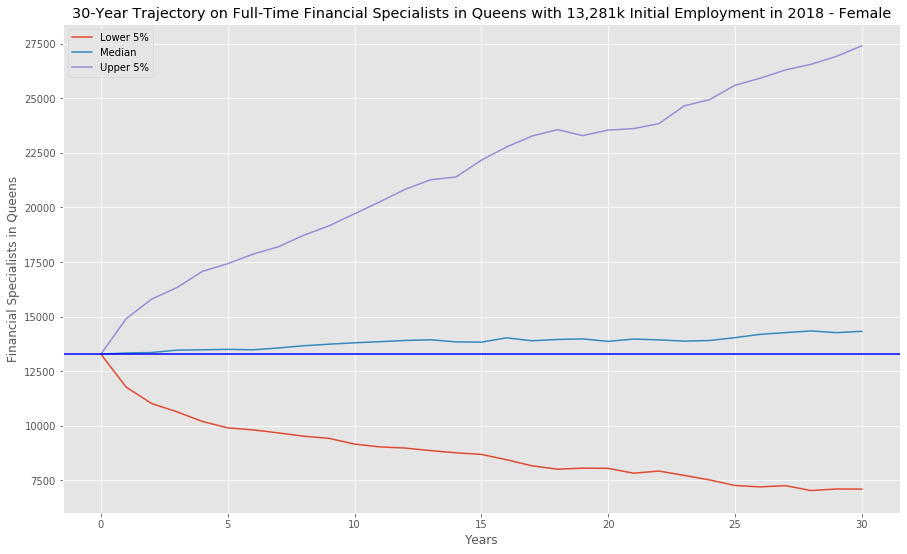

In [306]:
ax_cum_employed_queens = plt.figure()
employed_trajectories_queens.plot(title="30-Year Trajectory on Full-Time Financial Specialists in Queens with 13,281k Initial Employment in 2018 - Female",
                          figsize=(15, 9))
#plt.axhline(y = financial_queens_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_queens_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Queens')
plt.show()

### Monte Carlo Simulation on Full-Time Financial Specialists in Staten Island Over 30 Years Starting from 2018

In [276]:
df_staten = financial_specialists_Staten_Island
df_staten

Financial_specialists_male  \
County Year Name                                                    
085    2010 Richmond County, New York                      2906.0   
       2011 Richmond County, New York                      3572.0   
       2012 Richmond County, New York                      2745.0   
       2013 Richmond County, New York                      3765.0   
       2014 Richmond County, New York                      3114.0   
       2015 Richmond County, New York                      2924.0   
       2016 Richmond County, New York                      3704.0   
       2017 Richmond County, New York                      3274.0   
       2018 Richmond County, New York                      3342.0   

                                       Financial_specialists_female  
County Year Name                                                     
085    2010 Richmond County, New York                        1931.0  
       2011 Richmond County, New York                        1964.0  
       2012 Richmond County, New York                        2989.0  
       2013 Richmond County, New York                        2190.0  
       2014 Richmond County, New York                        1606.0  
       2015 Richmond County, New York                        2988.0  
       2016 Richmond County, New York                        1802.0  
       2017 Richmond County, New York                        2378.0  
       2018 Richmond County, New York                        3495.0

In [277]:
# Use the `pct_change` function to calculate daily returns of `male` and `female`.
annual_moves_staten = df_staten.pct_change().fillna(0)
annual_moves_staten

Financial_specialists_male  \
County Year Name                                                    
085    2010 Richmond County, New York                    0.000000   
       2011 Richmond County, New York                    0.229181   
       2012 Richmond County, New York                   -0.231523   
       2013 Richmond County, New York                    0.371585   
       2014 Richmond County, New York                   -0.172908   
       2015 Richmond County, New York                   -0.061015   
       2016 Richmond County, New York                    0.266758   
       2017 Richmond County, New York                   -0.116091   
       2018 Richmond County, New York                    0.020770   

                                       Financial_specialists_female  
County Year Name                                                     
085    2010 Richmond County, New York                      0.000000  
       2011 Richmond County, New York                      0.017090  
       2012 Richmond County, New York                      0.521894  
       2013 Richmond County, New York                     -0.267313  
       2014 Richmond County, New York                     -0.266667  
       2015 Richmond County, New York                      0.860523  
       2016 Richmond County, New York                     -0.396921  
       2017 Richmond County, New York                      0.319645  
       2018 Richmond County, New York                      0.469722

In [278]:
# Use the `mean` function to calculate the mean of market shifts for `male` and `female`, respectively
avg_annual_moves_financial_staten_male = annual_moves_staten.mean()['Financial_specialists_male']
avg_annual_moves_financial_staten_female = annual_moves_staten.mean()['Financial_specialists_female']
avg_annual_moves_financial_staten_male

0.034084051475437804

In [279]:
avg_annual_moves_financial_staten_female

0.13977476125003532

In [280]:
# Use the `std` function to calculate the standard deviation of market moves for `male` and `female`, respectively
std_dev_annual_moves_financial_staten_male = annual_moves_staten.std()['Financial_specialists_male']
std_dev_annual_moves_financial_staten_female = annual_moves_staten.std()['Financial_specialists_female']
std_dev_annual_moves_financial_staten_male

0.2098912804193371

In [281]:
std_dev_annual_moves_financial_staten_female

0.4272379980869996

In [282]:
# Set number of simulations and trading days
num_simulations = 1000
num_years = 30

# Set last employment figures of `Software_devops_male` and `Software_devops_female`
financial_staten_male_last  = df_staten['Financial_specialists_male'][-1]
financial_staten_female_last = df_staten['Financial_specialists_female'][-1]
# financial_specialists_female_last = df['Financial_specialists_female'][-1]

# Initialize empty DataFrame to hold simulated employment data for each simulation
simulated_staten_employed_df = pd.DataFrame()
staten_employed_cumulative_moves = pd.DataFrame()

# Run the simulation of projecting employment for the next 30 years, `1000` times
for n in range(num_simulations):
    
    count = 0
    
    simulated_financial_specialist_staten_male = []
    simulated_financial_specialist_staten_female = []

    # Initialize the simulated prices list with the last employmentdata of `Software_devops_male` and `Software_devops_female`
    simulated_financial_specialists_staten_male = [financial_staten_male_last]
    simulated_financial_specialists_staten_female = [financial_staten_female_last]
    
            
    
    # Simulate the returns for 30 years
    for i in range(num_years):
        
        if count == 30:
            break
            
        simulated_financial_specialist_staten_male = simulated_financial_specialists_staten_male[count] * (1 + np.random.normal(avg_annual_moves_financial_staten_male, std_dev_annual_moves_financial_staten_male))
        simulated_financial_specialist_staten_female = simulated_financial_specialists_staten_female[count] * (1 + np.random.normal(avg_annual_moves_financial_staten_female, std_dev_annual_moves_financial_staten_female))

        simulated_financial_specialists_staten_male.append(simulated_financial_specialist_staten_male)
        simulated_financial_specialists_staten_female.append(simulated_financial_specialist_staten_female)
        
        count += 1
            
    # Append a simulated prices of each simulation to DataFrame
    simulated_staten_employed_df['Financial_specialists_male'] = simulated_financial_specialists_staten_male
    simulated_staten_employed_df['Financial_specialists_female'] = simulated_financial_specialists_staten_female
    
    # Calculate the daily returns of simulated prices
    simulated_staten_employed_moves = simulated_staten_employed_df.pct_change()
    
    # Set the portfolio weights (0% male; 100% female)
    weights = [0.0, 1.0]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    staten_employed_annual_moves = simulated_staten_employed_moves.dot(weights)
    
    # Calculate the normalized, cumulative return series
    staten_employed_cumulative_moves[n] = (1 + staten_employed_annual_moves.fillna(0)).cumprod()

# Print records from the DataFrame
staten_employed_cumulative_moves

0         1         2          3         4           5         6    \
0   1.000000  1.000000  1.000000   1.000000  1.000000    1.000000  1.000000   
1   1.719252  1.748562  1.055450   1.251549  1.034355    1.366757  1.185079   
2   2.034285  1.020302  1.519956   0.664211  0.448810    1.666154  0.334239   
3   2.179626  1.779396  1.782619   0.495555  0.708887    1.996090  0.263295   
4   0.949342  0.974334  3.140146   0.392394  0.505393    1.212729  0.601913   
5   1.469456  0.800794  4.978245   0.539243  0.677847    1.579221  0.881000   
6   1.915758  0.962677  4.543779   0.606539  0.780081    2.556095  0.794746   
7   2.143955  1.275770  1.060940   0.624555  0.455421    2.420627  1.324647   
8   0.630445  1.572490  1.901922   1.113055  0.683208    2.177170  2.422321   
9   0.344011  2.236180  2.576385   1.495482  0.240599    4.016643  3.871869   
10  0.327784  2.416496  0.768753   0.742850  0.355135    6.629663  5.722648   
11  0.419316  3.591949  0.784528   0.871496  0.422081    7.174801  4.173318   
12  0.582437  3.054947  1.045628   1.069296  0.614147   11.020134  6.062801   
13  0.167470  4.532887  1.621973   1.090056  0.587296   16.954578  3.230123   
14  0.225266  7.238025  1.785517   1.370377  0.338319   14.316460  2.598913   
15  0.326379  4.425861  1.713234   1.886982  0.170845   18.341877  3.610874   
16  0.461606  5.227615  2.105281   2.472564  0.149628   26.668608  4.898006   
17  0.624848  4.558458  1.687811   3.296257  0.147985   36.538420  8.451726   
18  0.505766  5.515827  2.789029   4.437026  0.078706   56.957520  4.108672   
19  0.252185  7.728111  3.398300   5.273862  0.100212   77.307995  1.501525   
20  0.431207  2.896963  3.295967   7.431418  0.084921  110.666499  1.896645   
21  0.883269  4.666778  6.496987  13.045050  0.071345   70.264572  3.139797   
22  0.887800  6.497350  4.266232  23.546041  0.066058   48.798566  6.261024   
23  1.643074  6.888816  8.206768  16.775723  0.072851   59.756059  9.247265   
24  1.575445  4.949618  7.344909   2.441733  0.085211   54.094117  6.692009   
25  2.094085  6.113558  6.195136   1.203320  0.098505  111.885967  5.884247   
26  2.814636  4.488615  4.844130   1.278831  0.142716  145.170093  7.070821   
27  2.666711  4.069570  6.570255   1.306380  0.113927  263.486693  5.068046   
28  4.018684  5.413888  6.017982   1.388901  0.170863  356.315684  5.887185   
29  4.833092  2.313490  9.170319   1.507886  0.184273  498.285187  5.084671   
30  8.353047  2.172471  8.614171   3.364411  0.291369  350.042624  4.106920   

         7           8          9    ...       990       991       992  \
0   1.000000    1.000000   1.000000  ...  1.000000  1.000000  1.000000   
1   0.620996    1.091799   0.824558  ...  1.321359  0.856044  0.349158   
2   0.168086    1.361337   0.744647  ...  1.170137  1.183875  0.183568   
3   0.038737    1.493533   1.117413  ...  1.098923  0.702679  0.341909   
4   0.044546    1.668175   0.896356  ...  1.277794  0.876896  0.415717   
5   0.038098    1.240248   1.310180  ...  1.533893  1.330873  0.680388   
6   0.050127    1.405270   2.165934  ...  1.906005  1.704523  0.610968   
7   0.079317    1.407410   2.483018  ...  0.734412  1.503861  0.828659   
8   0.043389    1.902059   2.393511  ...  0.931801  1.921481  0.789268   
9   0.051890    2.559119   3.014224  ...  0.476597  1.940954  1.301723   
10  0.044750    3.341671   2.520596  ...  0.945574  1.169719  0.905332   
11  0.044498    6.325789   3.200655  ...  1.448263  1.897608  0.822607   
12  0.070849    8.857605   2.998986  ...  0.787827  2.615838  1.077651   
13  0.032936   12.039676   3.534702  ...  1.269811  4.604722  0.614658   
14  0.015527   11.181793   5.483590  ...  0.538420  3.117174  0.289979   
15  0.016310   22.131968   4.930469  ...  0.391060  3.405160  0.538929   
16  0.026351   30.864498   8.014972  ...  0.789887  4.166810  0.800094   
17  0.026699   45.885853   5.873734  ...  0.970355  3.683060  0.879394   
18  0.051898   41.103469   9.779610  ...  0.979561  2.247737  0.909024   


<Figure size 432x288 with 0 Axes>

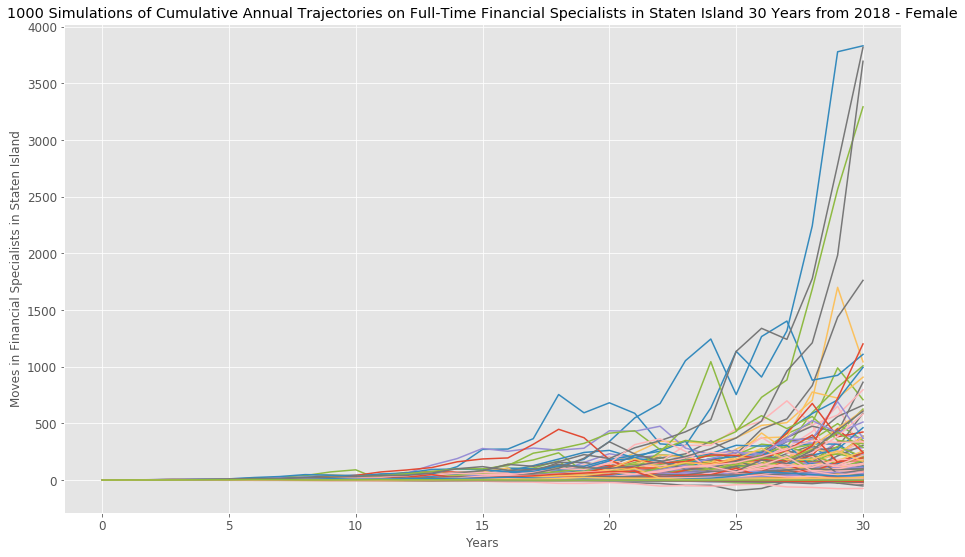

In [283]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the employment on software developers based on a year
monte_carlo_cum_moves_staten = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Financial Specialists in Staten Island 30 Years from 2018 - Female"
staten_employed_cumulative_moves.plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Moves in Financial Specialists in Staten Island')
plt.show()

In [284]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
ending_cumulative_moves_staten = staten_employed_cumulative_moves.iloc[-1, :]
ending_cumulative_moves_staten.head()

0    8.353047
1    2.172471
2    8.614171
3    3.364411
4    0.291369
Name: 30, dtype: float64

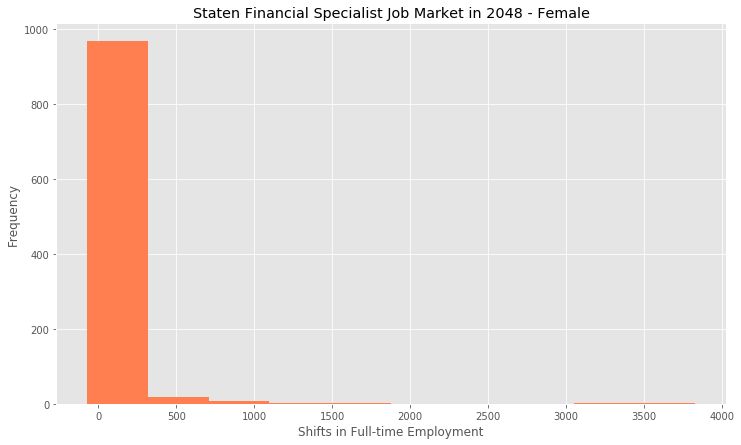

In [286]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
fig_hist_staten = plt.figure()
ending_cumulative_moves_staten.plot(kind='hist', bins=10, color = 'coral', 
                             title='Staten Financial Specialist Job Market in 2048 - Female', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.show()

In [287]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
confidence_interval_staten = ending_cumulative_moves_staten.quantile(q=[0.025, 0.975])
confidence_interval_staten

0.025     -2.063434
0.975    372.238867
Name: 30, dtype: float64

In [288]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative moves ranges
ending_cumulative_moves_staten.value_counts(bins=10) / len(ending_cumulative_moves_staten)

(-76.96000000000001, 317.29]    0.967
(317.29, 707.637]               0.019
(707.637, 1097.983]             0.007
(3440.061, 3830.407]            0.003
(1097.983, 1488.329]            0.002
(3049.714, 3440.061]            0.001
(1488.329, 1878.676]            0.001
(2659.368, 3049.714]            0.000
(2269.022, 2659.368]            0.000
(1878.676, 2269.022]            0.000
Name: 30, dtype: float64

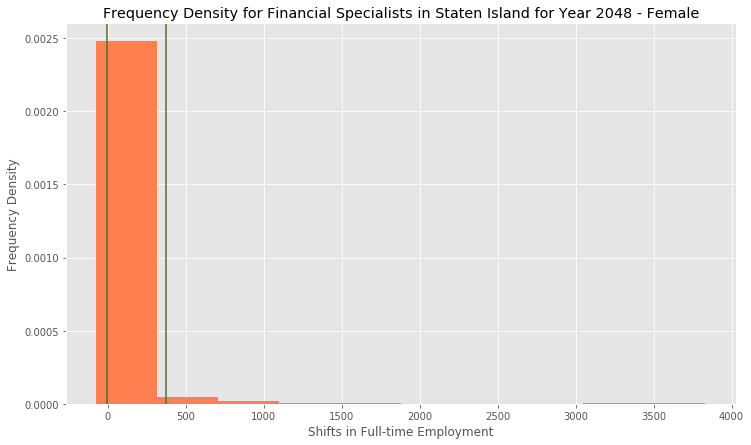

In [289]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_cum_moves_staten = plt.figure()
ending_cumulative_moves_staten.plot(kind='hist', density=True, bins=10, color = 'coral', 
                             title='Frequency Density for Financial Specialists in Staten Island for Year 2048 - Female', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(confidence_interval_staten.iloc[0], color='darkolivegreen')
plt.axvline(confidence_interval_staten.iloc[1], color='darkolivegreen')
plt.show()

In [290]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
tenth_cumulative_moves_staten = staten_employed_cumulative_moves.iloc[-20, :]
tenth_cumulative_moves_staten.head()

0    0.419316
1    3.591949
2    0.784528
3    0.871496
4    0.422081
Name: 11, dtype: float64

In [291]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
tenth_confidence_interval_staten = tenth_cumulative_moves_staten.quantile(q=[0.025, 0.975])
tenth_confidence_interval_staten

0.025    -0.081332
0.975    19.676449
Name: 11, dtype: float64

In [292]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative moves ranges
tenth_cumulative_moves_staten.value_counts(bins=10) / len(tenth_cumulative_moves_staten)

(-5.018000000000001, 2.827]    0.610
(2.827, 10.594]                0.297
(10.594, 18.36]                0.062
(18.36, 26.127]                0.016
(26.127, 33.894]               0.006
(33.894, 41.66]                0.004
(49.427, 57.194]               0.002
(41.66, 49.427]                0.002
(64.96, 72.727]                0.001
(57.194, 64.96]                0.000
Name: 11, dtype: float64

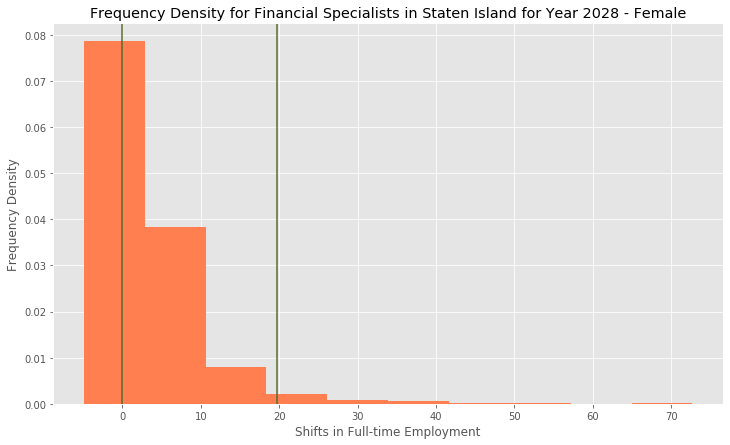

In [293]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_tenth_cum_moves_staten = plt.figure()
tenth_cumulative_moves_staten.plot(kind='hist', density=True, bins=10, color = 'coral', 
                             title='Frequency Density for Financial Specialists in Staten Island for Year 2028 - Female', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(tenth_confidence_interval_staten.iloc[0], color='darkolivegreen')
plt.axvline(tenth_confidence_interval_staten.iloc[1], color='darkolivegreen')
plt.show()

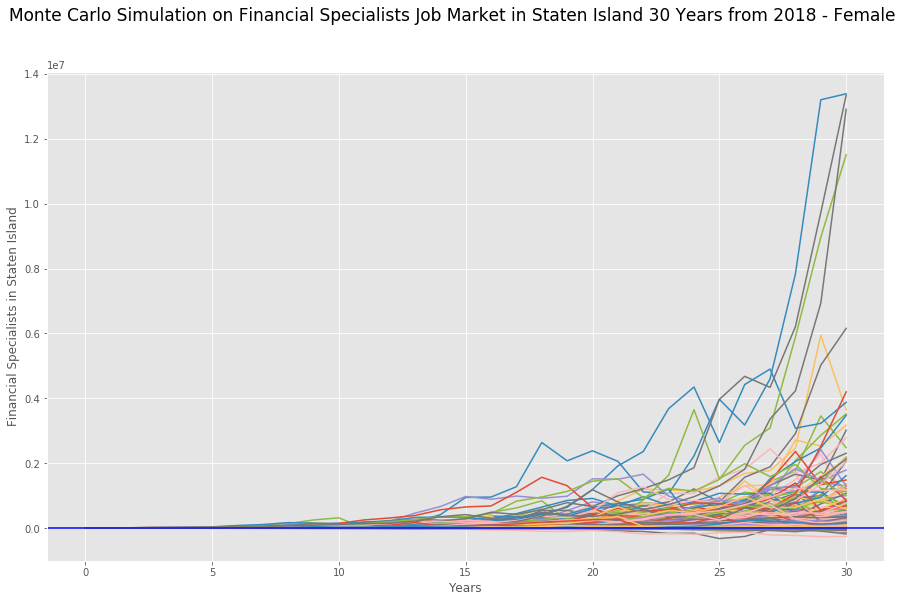

In [295]:
# Set initial employment
initial_employment_staten = financial_staten_female_last 

fig_finance_staten = plt.figure(figsize=(15,9))
fig_finance_staten.suptitle('Monte Carlo Simulation on Financial Specialists Job Market in Staten Island 30 Years from 2018 - Female', fontsize=17)
plt.plot(staten_employed_cumulative_moves * initial_employment_staten)
#plt.axhline(y = financial_staten_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_staten_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Staten Island')
plt.show()

In [296]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
employment_gnl_lower_bound_staten = initial_employment_staten * confidence_interval_staten.iloc[0]
employment_gnl_upper_bound_staten = initial_employment_staten * confidence_interval_staten.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_staten:,.0f}k in female financial specialists"
      f" in Staten Island over the next 30 years will end within in the range of"
      f" {employment_gnl_lower_bound_staten:,.0f}k and {employment_gnl_upper_bound_staten:,.0f}k.")

There is a 95% chance that an initial employment of 3,495k in female financial specialists in Staten Island over the next 30 years will end within in the range of -7,212k and 1,300,975k.


In [297]:
# Calculate employment gain/loss of lower and upper bound cumulative portfolio returns
tenth_employment_gnl_lower_bound_staten = initial_employment_staten * tenth_confidence_interval_staten.iloc[0]
tenth_employment_gnl_upper_bound_staten = initial_employment_staten * tenth_confidence_interval_staten.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_staten:,.0f}k in female financial specialists"
      f" in Staten Island over the next 10 years will end within in the range of"
      f" {tenth_employment_gnl_lower_bound_staten:,.0f}k and {tenth_employment_gnl_upper_bound_staten:,.0f}k.")

There is a 95% chance that an initial employment of 3,495k in female financial specialists in Staten Island over the next 10 years will end within in the range of -284k and 68,769k.


In [298]:
employed_trajectories_staten = initial_employment_staten * staten_employed_cumulative_moves.quantile(q=[0.05, 0.5, 0.95], axis='columns', numeric_only=True).T
employed_trajectories_staten.columns = ['Lower 5%', 'Median', 'Upper 5%']
employed_trajectories_staten

Lower 5%        Median       Upper 5%
0   3495.000000   3495.000000    3495.000000
1   1453.526412   3942.865693    6472.791346
2   1051.338827   4352.866714    9599.010568
3    761.665185   4554.623889   11897.707102
4    630.376018   4867.477871   15262.727556
5    436.708169   5143.261484   19869.609340
6    353.588755   5385.512980   23214.299068
7    238.980793   5687.365658   27681.723581
8    153.660416   6128.045388   33892.754307
9    133.527656   6236.501812   42262.959242
10    80.768654   6076.649017   44415.899040
11    23.091558   6338.044964   52056.145531
12     3.187378   6519.967717   62771.615557
13   -12.168235   6698.224334   71461.028961
14   -42.400640   6860.598869   84346.844877
15   -47.176442   6790.909124  101126.848835
16   -65.939441   7258.240356  111290.622056
17  -103.689731   6920.955444  142192.186476
18  -135.558961   7210.493074  160982.928910
19  -183.566679   8096.354515  195130.224406
20  -287.658559   7998.002758  219160.560668
21  -362.716185   7425.643095  241240.549574
22  -421.693525   8633.021878  255442.349896
23  -567.487636   8825.347593  300398.112831
24  -621.286584   8907.174236  333362.955863
25  -749.594550   9527.893375  416400.630185
26  -789.887781   9812.087831  487998.728730
27  -983.297566   9308.260075  583620.714553
28 -1058.762562   9736.950931  535579.274819
29 -1500.506304   9828.932948  523107.940946
30 -1524.341962  10016.290243  622126.439979

<Figure size 432x288 with 0 Axes>

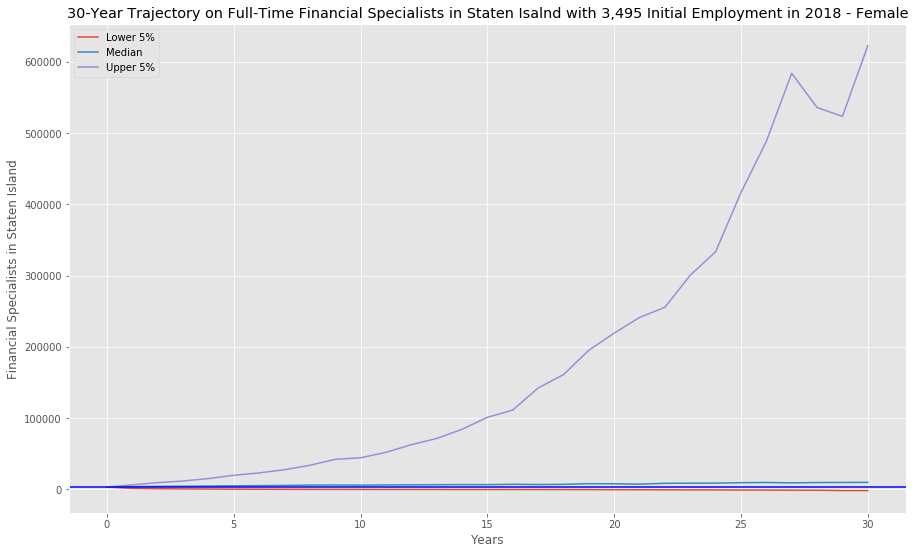

In [300]:
ax_cum_employed_staten = plt.figure()
employed_trajectories_staten.plot(title="30-Year Trajectory on Full-Time Financial Specialists in Staten Isalnd with 3,495 Initial Employment in 2018 - Female",
                          figsize=(15, 9))
#plt.axhline(y = financial_staten_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_staten_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Staten Island')
plt.show()

<Figure size 432x288 with 0 Axes>

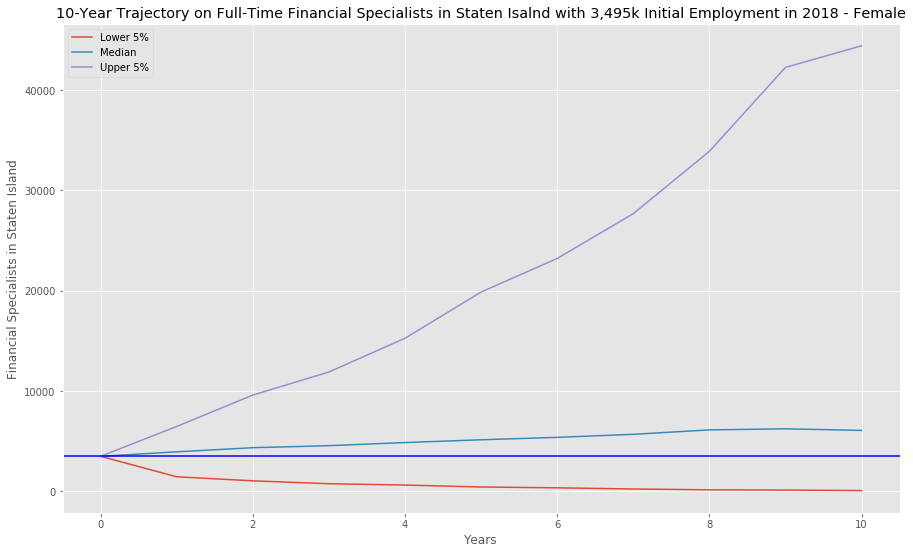

In [307]:
ax_cum_employed_staten = plt.figure()
employed_trajectories_staten.iloc[0:11, :].plot(title="10-Year Trajectory on Full-Time Financial Specialists in Staten Isalnd with 3,495k Initial Employment in 2018 - Female",
                          figsize=(15, 9))
#plt.axhline(y = financial_staten_male_last, color = 'black', linestyle = '-')
plt.axhline(y = financial_staten_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Staten Island')
plt.show()